# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

**Исследование объявлений о продаже квартир**

В ходе исследования будет изучен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Цели и задачи исследования**

1. Найти аномалии и выбросы в имеющихся данных.
2. Получить информацию о времени продажи квартиры.
3. Найти факторы, которые большего всего влияют на стоимость квартиры.
4. Изучить предложение квартир по локации.
5. Выделить и получить информацию по квартирам в центре Санкт-Петербурга.

**Ход исследования**

В файле "real_estate_data.csv" содержится архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных: 1) пользовательские 2) получены автоматически на основе картографических данных.

Т.к. часть данных записаны пользователями, они могут содержать ошибки. Ошибки также могут быть и в данных, полученных автоматически на основе картографических данных. Для начала нужен обзор данных. Далее, будем делать предобработку данных. Искать аномалии, пропущенные значения и т.д.

**Для решения поставленных задач необходимо рассчитать и добавить в набор данных новые признаки:**

1. Цена за 1 квадратный метр,
2. День недели, месяц и год публикации объявления,
3. Этаж квартиры (первый, последний, другой).

**Этапы исследования:**

1. Обзор данных.
2. Предобработка данных.
3. Расчёты и добавление результатов в таблицу.
4. Исследовательский анализ данных.
5. Выводы

**Подключим необходимые библиотеки**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Подключим и откроем набор данныхю Изучим основную информацию о наборе**

In [2]:
# data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data = pd.read_csv(r'C:\Users\user\real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Посмотрим названия столбцов в датафрейме**

In [4]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Описание данных**

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

**balcony** — число балконов

**ceiling_height** — высота потолков (м)

**cityCenters_nearest** — расстояние до центра города (м)

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

**first_day_exposition** — дата публикации

**floor** — этаж

**floors_total** — всего этажей в доме

**is_apartment** — апартаменты (булев тип)

**kitchen_area** — площадь кухни в квадратных метрах (м²)

**last_price** — цена на момент снятия с публикации

**living_area** — жилая площадь в квадратных метрах (м²)

**locality_name** — название населённого пункта

**open_plan** — свободная планировка (булев тип)

**parks_around3000** — число парков в радиусе 3 км

**parks_nearest** — расстояние до ближайшего парка (м)

**ponds_around3000** — число водоёмов в радиусе 3 км

**ponds_nearest** — расстояние до ближайшего водоёма (м)

**rooms** — число комнат

**studio** — квартира-студия (булев тип)

**total_area** — общая площадь квартиры в квадратных метрах (м²)

**total_images** — число фотографий квартиры в объявлении

**Отдельно посмотрим типы данных в столбцах**

In [5]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

**Выведем количество пропусков в наборе данных**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Построим гистограммы для всех числовых столбцов таблицы**

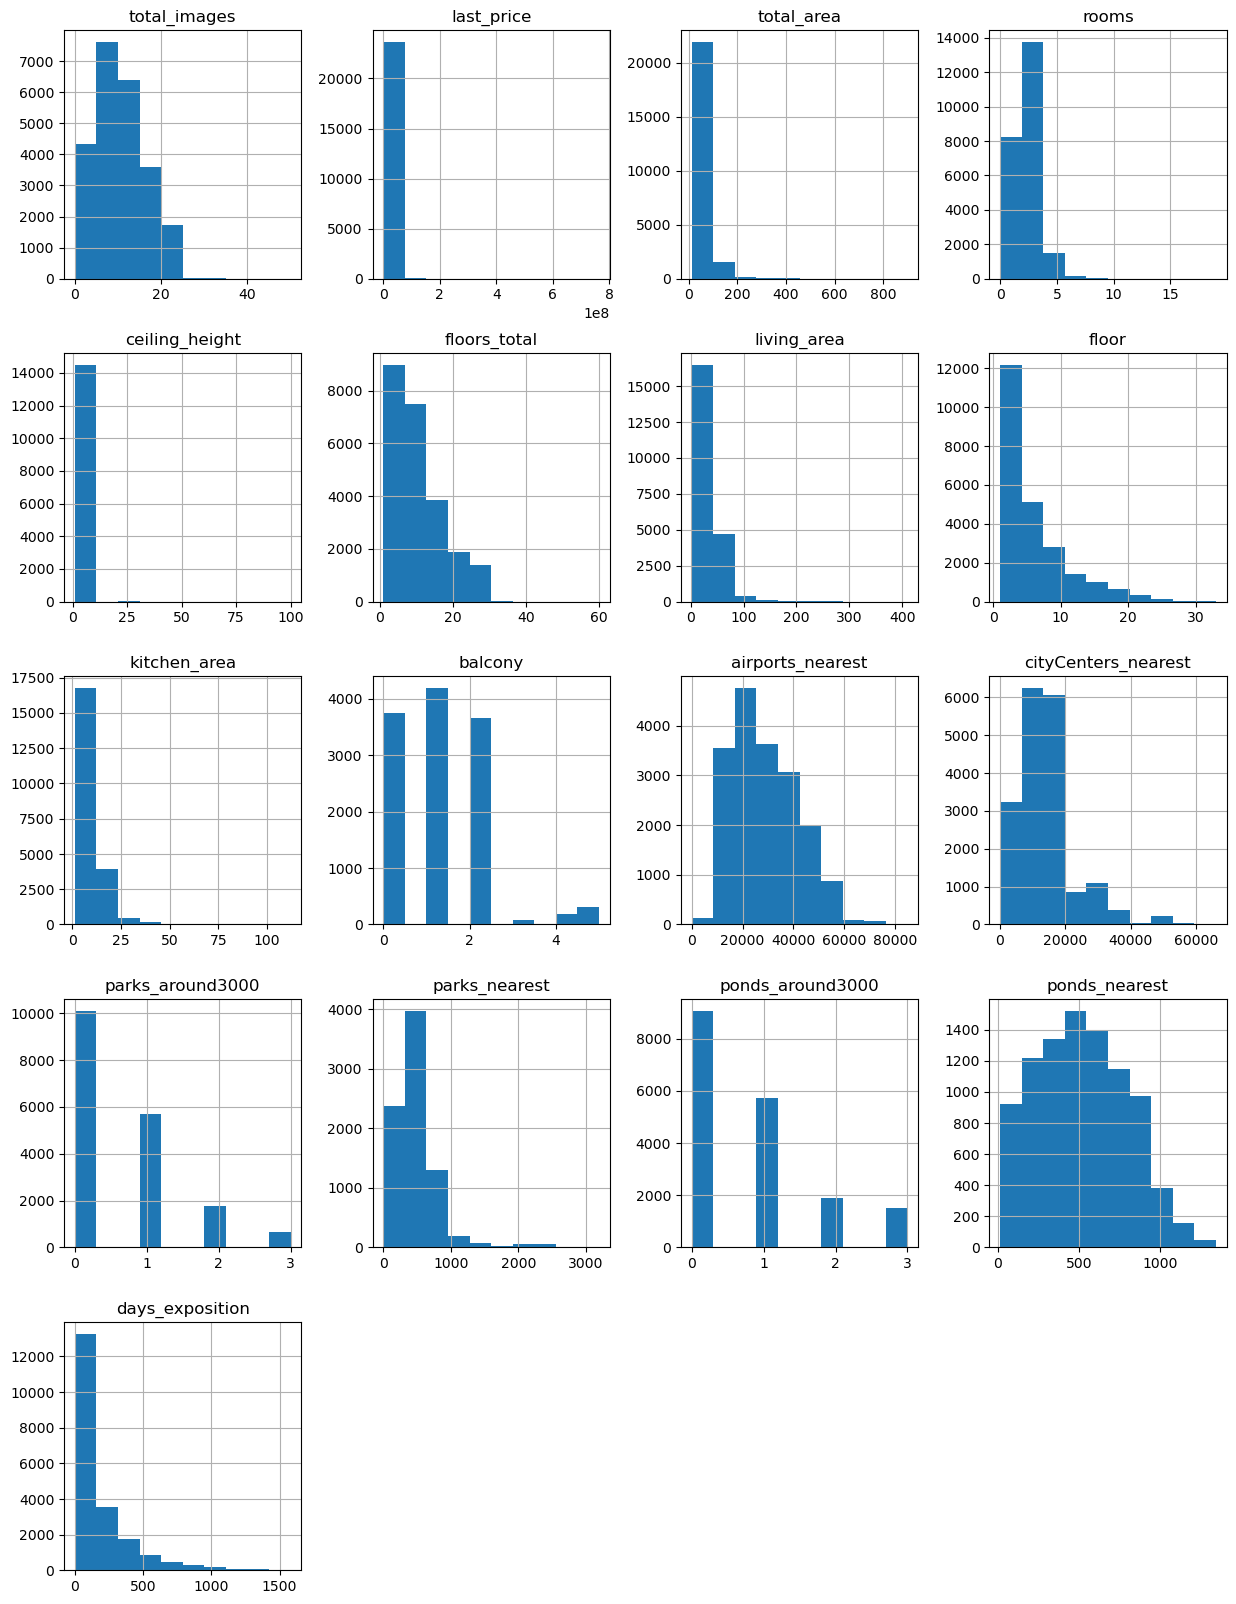

In [7]:
data.hist(figsize=(15, 20))
plt.show()

**Выведем основные показатели описательной статистики и транспонируем датафрейм для удобства восприятия данных**

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


**По итогам первичного разведывательного анализа данных можно сделать следующие выводы:**

1. Датафрейм содержит пропущенные значения в некоторых столбцах и необходимо проводить работу по работе с этими пропущенными категориальными и количественными значениями (заполнение пропусков, восстановление, удаление и т.д.).

2. В датафрейме придется приводить тип данных в отдельных столбцах к коректному формату отображения данных (например: столбец 'first_day_exposition' к типу datetime, столбец 'days_exposition' к целочисленному int и т.д.).

3. Некоторые столбцы датафрейма необходимо переименовать и привести их наименование к змеиному регистру ('cityCenters_nearest', 'ponds_around3000' и 'parks_around3000').

4. Также будет проводиться работа по поиску явных и неявных дубликатов в датафрейме и работа с ними (удаление, приведение к единому названию).

5. Предварительный анализ данных и выявление аномалий по выведенным показателям описательной статистики также показывает, что имеются некоторые выбросы в минимальных и максимальных значениях (например в столбце 'last_price' минимальная цена квартиры 12190.0 рублей, в столбце 'kitchen_area' площадь кухни 1.3 метра). В целом же в датафрейме средние значения незначительно отличаются от медианных значений, что позволяет сделать выводы о том, что выбросов и аномальных значений немного и они на допустимом уровне статистической погрешности.

### Выполните предобработку данных

**Переименования столбцов**

In [9]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest',
                            'parks_around3000' : 'parks_around_3000',
                            'ponds_around3000' : 'ponds_around_3000'})

**Проверим результат переименования столбцов**

In [10]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

##### Работа с пропусками

**Выведем еще раз количество пропусков в каждом столбце**

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Количество пропусков в процентах**

In [12]:
pd.DataFrame(round(data.isna().mean()*100).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
is_apartment,88.000000
parks_nearest,66.000000
ponds_nearest,62.000000
balcony,49.000000
ceiling_height,39.000000
ponds_around_3000,23.000000
parks_around_3000,23.000000
city_centers_nearest,23.000000
airports_nearest,23.000000
days_exposition,13.000000


**Методика работы с пропущенными значениями:**

1. Столбцы: total_images — число фотографий квартиры в объявлении, last_price — цена на момент снятия с публикации, total_area — общая площадь квартиры в квадратных метрах (м²), first_day_exposition — дата публикации, floor — этаж, rooms — число комнат, open_plan — свободная планировка (булев тип), studio — квартира-студия (булев тип) не имеют пропусков (всего 8 столбцов из 22) и обрабатываться не будут.

2. В столбцах balcony — число балконов, parks_around_3000 — число парков в радиусе 3 км и ponds_around_3000 — число водоёмов в радиусе 3 км имеющиеся пропуски можно заменить нулевыми значениями. Причины отсутсвия данных по наличию балконов - это отсутствие самих балконов у объекта недвижимости и, соответственно, не внесение этих данных пользователем. Количество парков и водоёмов заполняются без участия пользователя и их отсутствие может означать, что эти данные не получены автоматически на основе картографических данных, т. е. по технической причине.

3. В столбцах, содержащих числовые данные в м², пропуски можно заменить медианными значениями. Это столбцы: kitchen_area — площадь кухни в квадратных метрах (м²), living_area — жилая площадь в квадратных метрах (м²), total_area — общая площадь квартиры в квадратных метрах (м²). Также медианным значением можно заменить отсутствующие данные в столбце ceiling_height — высота потолков (м). Причины данных пропусков субъективные, т. е. связанные с незаполнением данных пользователем по самым разным причинам. Например, отсутсвие данных в технической документации на объект недвижимости о площади помещений и высоте потолков, неумении произвести расчеты данных показателей, а также умышленное сокрытие этих данных пользователем как невыгодных и влияющих на стоимость квартиры (маленькая кухня, маленькая общая площадь, низкие потолки).

4. В столбце is_apartment — апартаменты (булев тип) произведем замену на значение 'False'. Причина отсутствия данных вероятнее всего в том, что объект недвижимости не относится к категории аппартементов и не заполнялся пользователем.

5. В столбцах floors_total — всего этажей в доме и locality_name — название населённого пункта отсутствующие значения заполнить или восстановить значения возможности нет и количество пропущенных значений очень маленькое (86 и 49 соответственно, в процентах: 0.36 и 0.20 от общего числа значений соответственно) и имеет допустимое статистическое значение для их удаления. Причина отсутсвия данных значений возможно технические потери данных, так как эти данные основные на что обращает внимание покупатель объекта недвижимости и в подавляющем большинстве объявлений они присутствуют и вносятся пользователями. Также может быть умышленное сокрытие этих данных пользователем как невыгодных для публикации в целях поднятия стоимости объекта недвижимости (неудачное расположение, малоэтажность).

6. Отстуствующие значения расстояний до каких-либо объектов (airports_nearest — расстояние до ближайшего аэропорта в метрах (м), city_сenters_nearest — расстояние до центра города (м), ponds_nearest — расстояние до ближайшего водоёма (м) и parks_nearest — расстояние до ближайшего парка (м)) от объекта недвижимости заменить нечем, так как это конкретные и уникальные значения по каждому объекту и получаются на основе картографических данных. По всей видимости данные не загружены по техническим причинам. Эти данные оставим с отсутствующими значениями несмотря на большое количество. В дальнейшем в исследовании проверим также гипотезу, что указанные данные не являются ключевыми и основными и не имеют воздействия на цену объекта недвижимости. 

7. Пропуски в столбце first_day_exposition — дата публикации также заменить не представляется возможным. Причина отсутствия этих данных - техническая, так как дата публикации должна формироваться автоматически и не зависит от пользователя. Столбец с пропусками оставляем.

**Обрабатываем и заменяем пропуски на 0 в столбцах 'balcony', 'parks_around_3000' и 'ponds_around_3000' с записью в датафрейм:**

In [13]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

**Заменим отсутствующие значения медианным значением в ранее определенных столбцах с записью в датафрейм:**

In [14]:
median = data[['kitchen_area', 'living_area', 'ceiling_height']].median()
data[['kitchen_area', 
      'living_area', 
      'ceiling_height']] = data[['kitchen_area','living_area', 'ceiling_height']].fillna(median)

In [15]:
data['total_area'].isna().sum()

0

**Далее перейдем к работе с пропусками в столбце is_apartment — апартаменты (булев тип) с записью в датафрейм:**

In [16]:
data['is_apartment'] = data['is_apartment'].fillna('False')

**Удалим отсутствующие значения столбцах floors_total — всего этажей в доме и locality_name — название населённого пункта**

In [17]:
data = data.dropna(subset=['floors_total'])
data = data.dropna(subset=['locality_name'])

**Проведем проверку проведенной работы с пропусками и удаления отсутствующих значений:**

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition          3171
dtype: int64

##### Работа с дубликатами

In [19]:
data.duplicated().sum()

0

 Явных дубликатов в датафрейме не имеется.

**Выведем количество значений всего в столбце и количество уникальных названий населенных пунктов**

In [20]:
data['locality_name'].count()

23565

In [21]:
len(data.locality_name.unique())

364

**Выведем уникальные значения в столбце**

In [22]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

**Методика работы с неявными дубликатами. Имеются неявные дубликаты в столбце датафрейма. Приведем разные названия населенных пунктов и их типы к единому наименованию:**

1. Произведем замену слова 'поселок' на 'посёлок'.

2. Произведем замену слов: 'садовое товарищество' на 'садоводческое некоммерческое товарищество'.

3. Произведем замену слова 'посёлок станции' на 'посёлок при железнодорожной станции'.

4. Приведем названия населенных пунктов к единому наименованию: 'Никольское' : 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'Мурино' и 'поселок Мурино' : 'посёлок Мурино', 'Коммунар' : 'поселок Коммунары', 'городской посёлок Павлово' : 'посёлок городского типа Павлово', 'поселок Рябово' : 'посёлок городского типа Рябово', 'деревня Калитино' : 'посёлок Калитино', 'городской посёлок Рощино' : 'посёлок городского типа Рощино', 'городской посёлок Мга' : 'посёлок городского типа Мга', 'садоводческое некоммерческое товарищество Приладожский' : 'посёлок городского типа Приладожский', 'посёлок Рабитицы' : 'деревня Рабитицы'.

**Проведем замену части дубликатов**

In [23]:
data['locality_name'] = data['locality_name'].str.replace('е','ё')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество','садоводческое некоммерческое товарищество')
data['locality_name'] = data['locality_name'].str.replace('посёлок станции','посёлок при железнодорожной станции')

**Проведем замену дублирующих названий населенных пунктов**

In [24]:
data = data.replace({'locality_name':{'Никольское' : 'село Никольское', 
                                      'городской посёлок Советский': 'посёлок городского типа Советский', 
                                      'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 
                                      'Мурино' : 'посёлок Мурино', 
                                      'Коммунар' : 'посёлок Коммунары', 
                                      'городской посёлок Павлово' : 'посёлок городского типа Павлово', 
                                      'посёлок Рябово' : 'посёлок городского типа Рябово', 
                                      'деревня Калитино' : 'посёлок Калитино', 
                                      'городской посёлок Рощино' : 'посёлок городского типа Рощино', 
                                      'городской посёлок Мга' : 'посёлок городского типа Мга', 
                                      'садоводческое некоммерческое товарищество Приладожский' : 'посёлок городского типа Приладожский', 
                                      'посёлок Рабитицы' : 'деревня Рабитицы'}})

**Посчитаем количество значений вего и количество уникальных значений в столбце еще раз после проведенных изменений**

In [25]:
data['locality_name'].count()

23565

In [26]:
len(data.locality_name.unique())

323

**Проведем еще раз поиск дубликатов, чтобы убедиться, что они не появились. Явных дубликатов в датафрейме не имеется.**

In [27]:
data.duplicated().sum()

0

##### Работа с типами данных.

**Методика работы с типами данных:**

1. Столбец first_day_exposition — дата публикации приводим к формату datetime для работы с ним как с данными даты и времени.

2. Столбцы balcony — число балконов, floors_total — всего этажей в доме, floor — этаж, parks_around_3000 — число парков в радиусе 3 км и ponds_around_3000 — число водоёмов в радиусе 3 км приводим к вещественному целочисленному типу значений, т. к. этажи, число водоемов, число парков - это целые значения.

3. Столбец is_apartment приводим к булеву типу (True/False), т. к. объект недвижимости может содержать два значения - является ли он апартаментами или нет.

**Выведем еще раз информацию о датафрейме с содержанием типов столбцов**

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest      18

**Выведем типы данных в столбцах отдельно:**

In [29]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

**Столбец first_day_exposition приведем к типу datatime**

In [30]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Далее приведем типы данных в отдельных столбцах к коректному целочисленному типу данных:**

In [31]:
data[['balcony', 
      'floor', 
      'parks_around_3000', 
      'ponds_around_3000', 
      'floors_total']] = data[['balcony', 'floor', 
                                    'parks_around_3000', 
                                    'ponds_around_3000', 
                                    'floors_total']].astype(int)

**Столбец is_apartment приведем к булевому типу**

In [32]:
data['is_apartment'] = data['is_apartment'].astype('bool')

**Поведем проверку изменений**

In [33]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int32
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int32
parks_nearest                  float64
ponds_around_3000                int32
ponds_nearest                  float64
days_exposition                float64
dtype: object

**Вывод по разделу предобработки данных:**

1. В ходе предобработки данных удалось максимально подготовить набор данных для дальнейшего анализа. В процессе подготовки были выявлены и обработаны пропуски значений, произведена проверка на наличие в данных явных и неявных дубликатов с последующей их обработкой. Также было осуществлено переименование отдельных столбцов и приведение их к коректному типу данных. 

2. Несмотря на это, в датафрейме все же осталось 5 столбцов с пропусками данных, произвести замену которых из-за их специфики невозможно. Удалять данные пропуски необходимости нет и в датафрейме мы оставим их без изменений.

3. Наличие данных пропусков существенным образом на исследование не повлияет и ислледование будет продолжено.

### Добавьте в таблицу новые столбцы

**Добавление столбца с ценой одного квадратного метра и округлением до двух знаков после запятой:**

In [34]:
data['one_square_price'] = data['last_price'] / data['total_area']
data['one_square_price'] = data['one_square_price'].round(2)

**Создадим столбцы с днем, месяцем и годом публикации:**

In [35]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

**Напишем функцию по категоризации объектов недвижимости по типам этажей (первый, последний, другой) и добавим новый столбец столбец floor_category в датафрейм**

In [36]:
def floor_category (row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis=1)

**Добавим столбец с расстоянием до центра города в километрах:**

In [37]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

**Приведем значения столбца 'floor_category' к типу данных категории:**

In [38]:
data['floor_category'] = data['floor_category'].astype('category')

**Проверим проведенное добавление столбцов и преобразование типов данных:**

In [39]:
data.dtypes

total_images                        int64
last_price                        float64
total_area                        float64
first_day_exposition       datetime64[ns]
rooms                               int64
ceiling_height                    float64
floors_total                        int32
living_area                       float64
floor                               int32
is_apartment                         bool
studio                               bool
open_plan                            bool
kitchen_area                      float64
balcony                             int32
locality_name                      object
airports_nearest                  float64
city_centers_nearest              float64
parks_around_3000                   int32
parks_nearest                     float64
ponds_around_3000                   int32
ponds_nearest                     float64
days_exposition                   float64
one_square_price                  float64
weekday_exposition                

### Проведите исследовательский анализ данных

##### Изучение основных параметров объектов недвижимости

**Общая площадь объектов недвижимости**

**Построим гистограму общей площади объектов недвижимости**

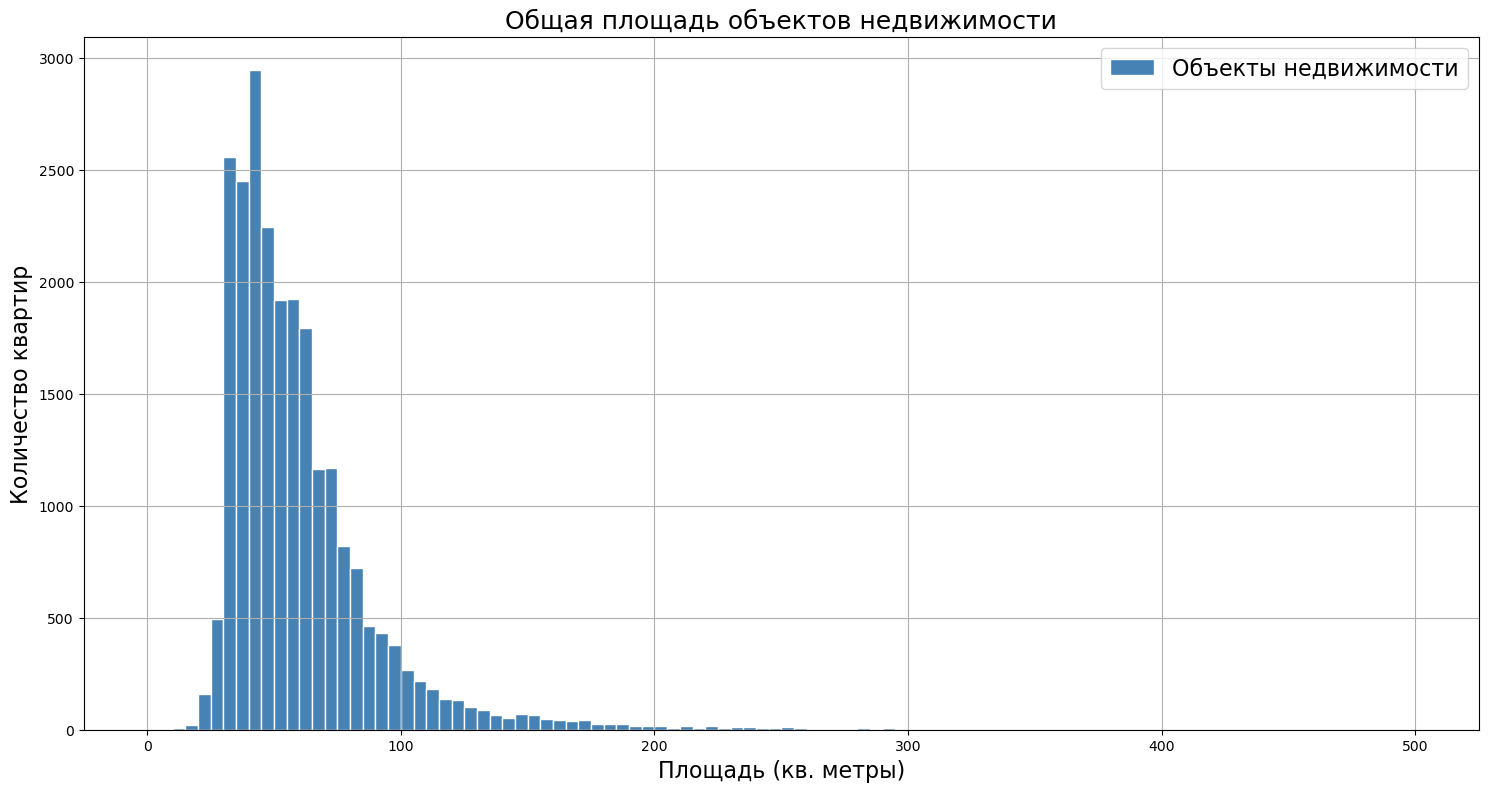

In [40]:
plt.figure(figsize=(18,9))
plt.hist(data['total_area'], bins=100, range=(0, 500), color='steelblue', ec='white')
plt.title('Общая площадь объектов недвижимости', fontsize=18)
plt.xlabel('Площадь (кв. метры)', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Построим диаграму размаха общей площади объектов недвижимости**

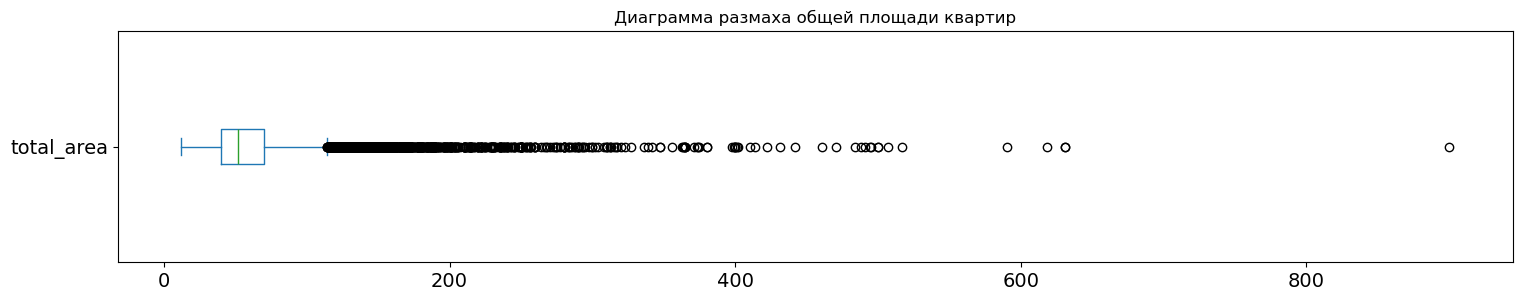

In [41]:
ax = data['total_area'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха общей площади квартир', 
    fontsize=14)
plt.show()

**Выведем основные показатели описательной статистики по столбу total_area:**

In [42]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

**Описание наблюдений:**

Анализ общей площади квартир показывает наличие выбросов (аномалий). Например, минимальная площадь квартиры - 12 кв. метров. Есть также квартира 900 кв. метров (маскимальная по площади), но она вероятнее всего не является аномалией, так как максимальная цена квартиры выявлена 763 млн. рублей. В целом среднее значение площади (60,3 кв. м.) близко к медианному значению площади (52 кв. м.). Также эти значения выглядят правдоподомными и реальными. Вцелом данные свидетельствуют о наличии немногих аномалий и выбросов. Возможно более точное рассмотрение с применением межквартильного размаха в диапазоне: 0.05 - 0.95 квантилей (со срезом аномально дешевых и аномально дорогих квартир).

Дополнительно сделаем срез датафрейма по столбцу total_area с межквартильным размахом в диапазоне: 0.05 - 0.95 квантили, т. е. срежем в датафрейме сверху и снизу по 5 процентов. Сохраним результат в отдельную переменную data_filtered_total_area.

In [43]:
q_low = data['total_area'].quantile(0.05)
q_hi  = data['total_area'].quantile(0.95)
data_filtered_total_area = data[(data['total_area'] < q_hi) & (data['total_area'] > q_low)]

**Построим еще раз гистограмму и диаграму размаха для признака общей площади объектов недвижимости**

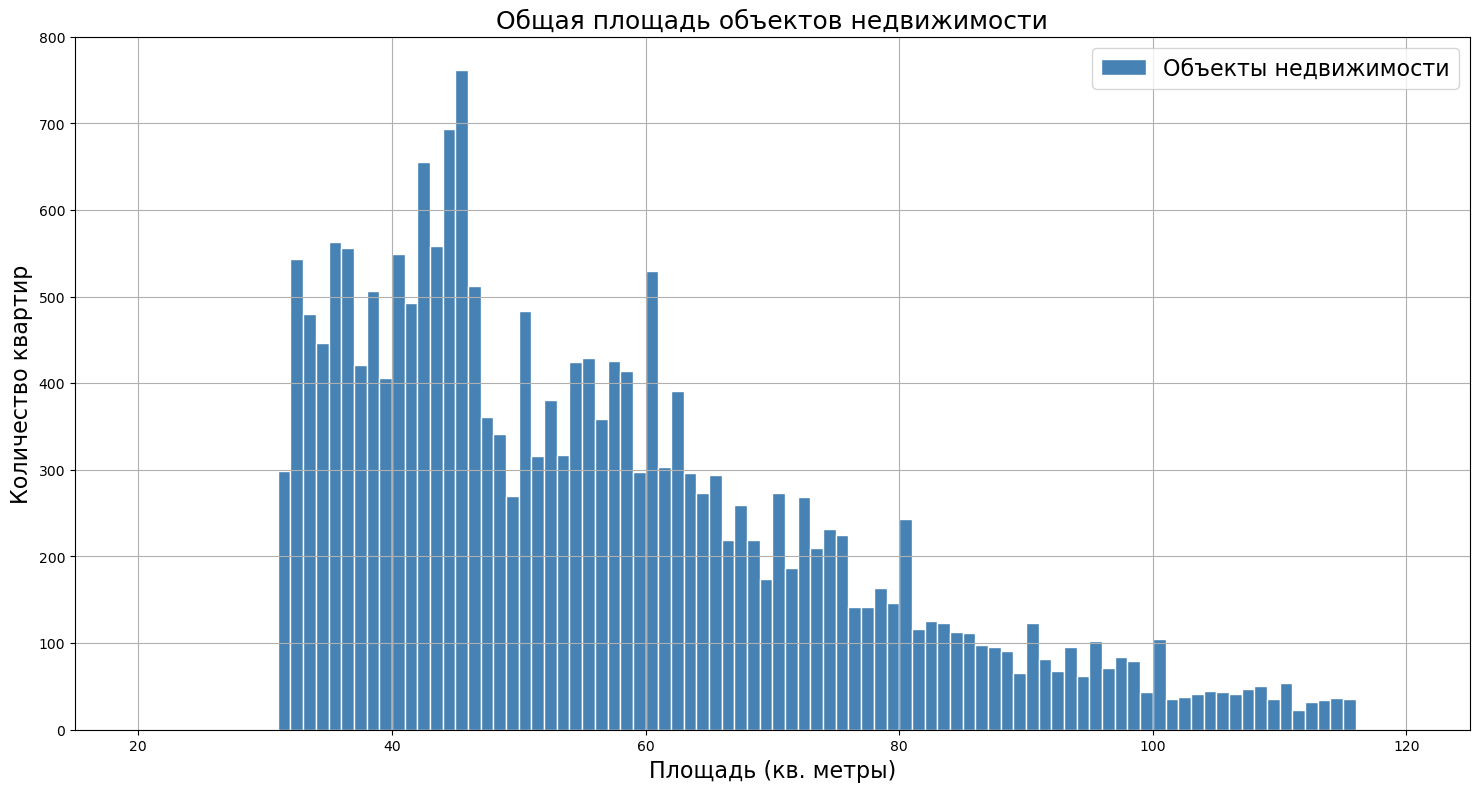

In [44]:
plt.figure(figsize=(18,9))
plt.hist(data_filtered_total_area['total_area'], bins=100, range=(20, 120), color='steelblue', ec='white')
plt.title('Общая площадь объектов недвижимости', fontsize=18)
plt.xlabel('Площадь (кв. метры)', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

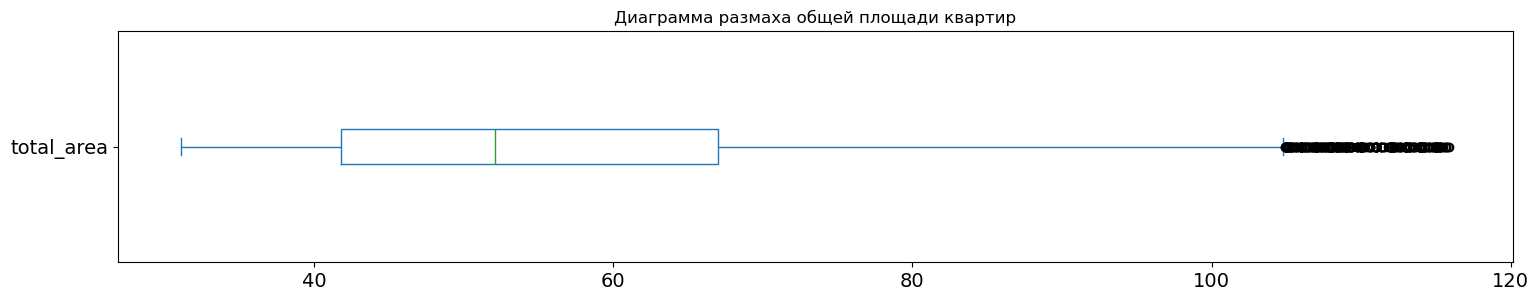

In [45]:
ax = data_filtered_total_area['total_area'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха общей площади квартир', 
    fontsize=14)
plt.show()

In [46]:
data_filtered_total_area['total_area'].describe()

count    20902.000000
mean        56.264236
std         18.872699
min         31.090000
25%         41.800000
50%         52.100000
75%         67.000000
max        115.900000
Name: total_area, dtype: float64

**Выводы:**

Средняя площадь объектов недвижимости стала 56.2 кв. м. и приблизилась и почти сравнялась с медианной площадью (52.1 кв. м.). В свою очередь медианная площадь не изменилась. Минимальная площадь квартиры стала 31 кв. метр, что выглят правдоподобнее по сравнению с предыдущим зафиксированным значением в 12 кв. м. Стандартное отклонение уменьшилось почти в два раза с 35 до 18, что в свою очередь показывает правильность выбора межквартильного размаха для получения наиболее точных данных. Данный срез избавил набор данных от аномальных значений и сделал выводимые данные наиболее реалистичными и корректными. Таким образом, можно достоверно сделать следующие выводы о том, что в 90 процентах случаев мы будем сталкиваться с указанными в данном срезе показателями по объектам недвижимости.

**Жилая площадь объектов недвижимости.**

**Построим гистограму жилой площади объектов недвижимости**

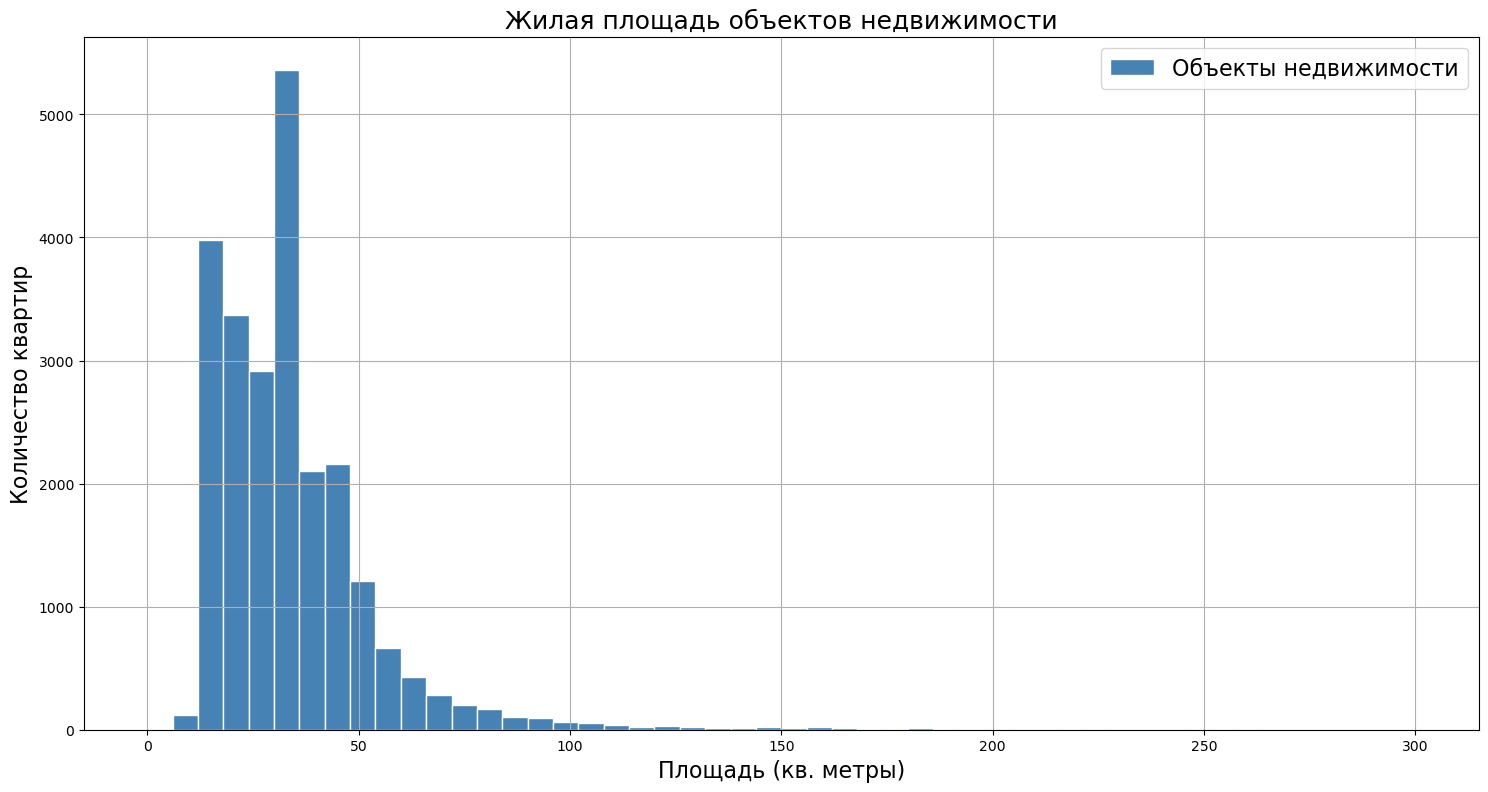

In [47]:
plt.figure(figsize=(18,9))
plt.hist(data['living_area'], bins=50, range=(0, 300), color='steelblue', ec='white')
plt.title('Жилая площадь объектов недвижимости', fontsize=18)
plt.xlabel('Площадь (кв. метры)', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Построим диаграму размаха жилой площади объектов недвижимости**

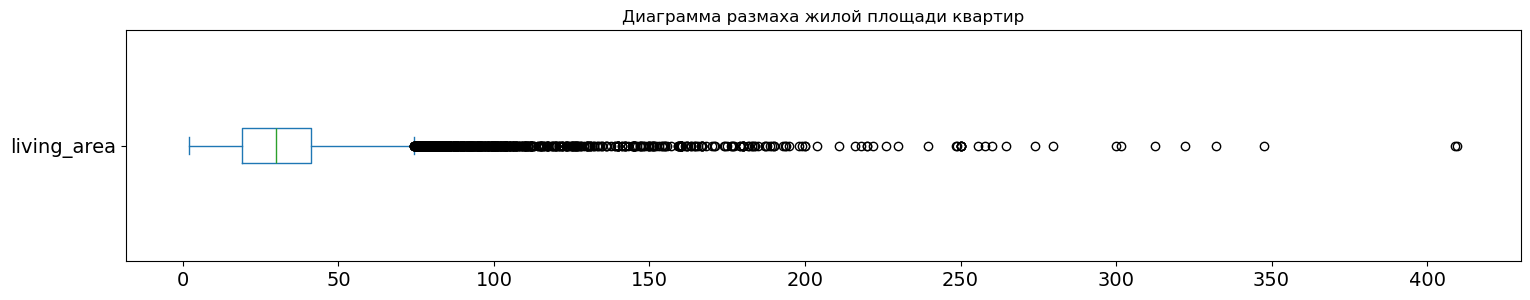

In [48]:
ax = data['living_area'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха жилой площади квартир', 
    fontsize=14)
plt.show()

**Выведем основные показатели описательной статистики по столбу living_area:**

In [49]:
data['living_area'].describe()

count    23565.000000
mean        34.102255
std         21.189133
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

**Описание наблюдений:**

В столбце жилой площади недвижимости аналогичная ситуация как и с общей площадью. Имеются аномалии и выбросы по минимальным и максимальным значениям площади - 2 кв. метра и 409 кв. метров соответственно. Средняя жилая площадь близка к медианному значению, но стандартное отклонение довольно высокое в 21 кв. метр, что составляет две трети от медианного значения. Попробуем в данном случае также применить аналогично с общей площадью срез с межквартильным размахом в 10 процентов по 5 процентов снизу и сверху без записи в датафрейм.

Срез датафрейма по столбцу living_area с межквартильным размахом в диапазоне: 0.05 - 0.95 квантили.

In [50]:
q_low = data['living_area'].quantile(0.05)
q_hi  = data['living_area'].quantile(0.95)
data_filtered_living_area = data[(data['living_area'] < q_hi) & (data['living_area'] > q_low)]

**Построим еще раз гистограмму и диаграму размаха для признака жилой площади объектов недвижимости**

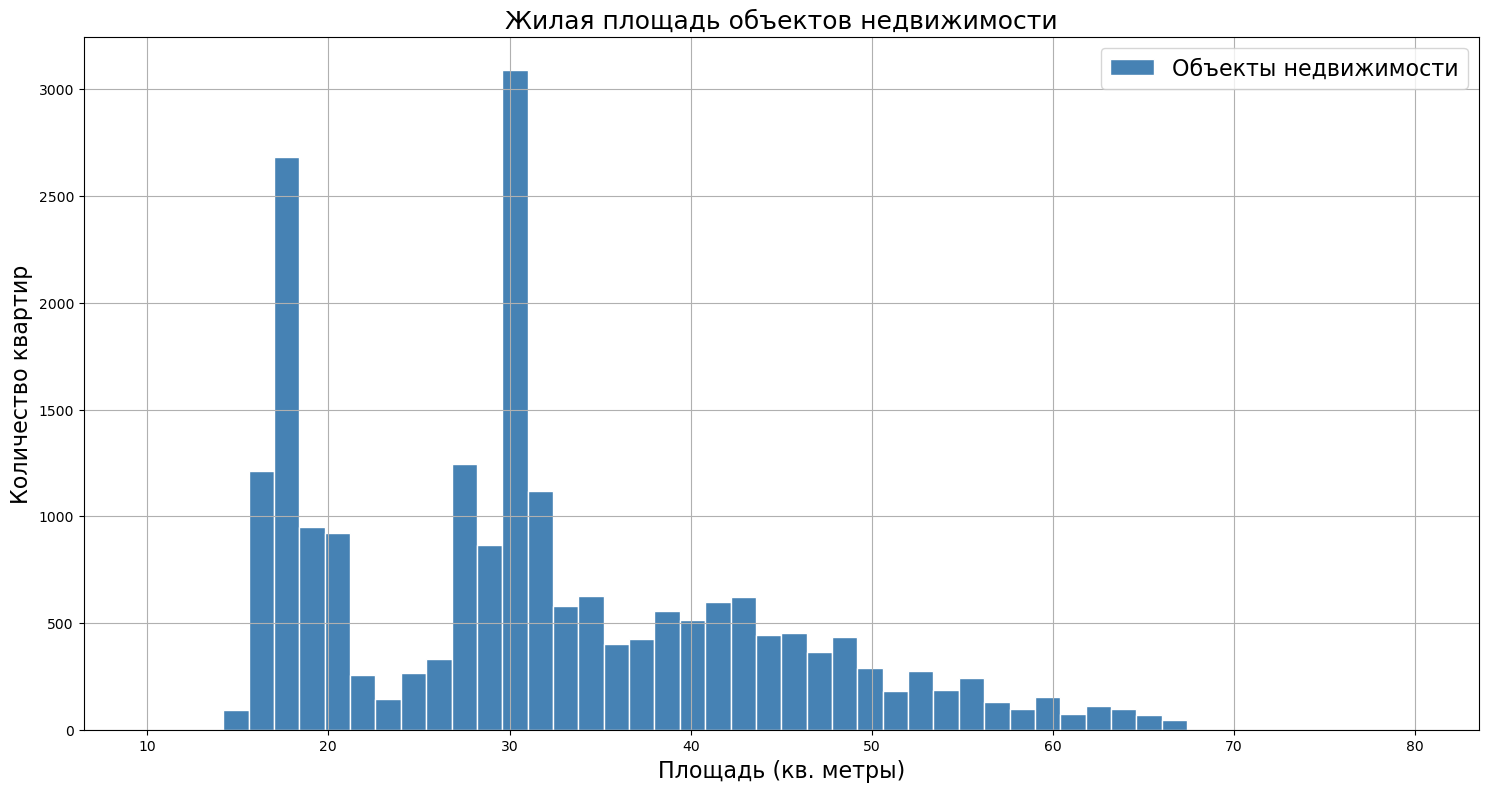

In [51]:
plt.figure(figsize=(18,9))
plt.hist(data_filtered_living_area['living_area'], bins=50, range=(10, 80), color='steelblue', ec='white')
plt.title('Жилая площадь объектов недвижимости', fontsize=18)
plt.xlabel('Площадь (кв. метры)', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

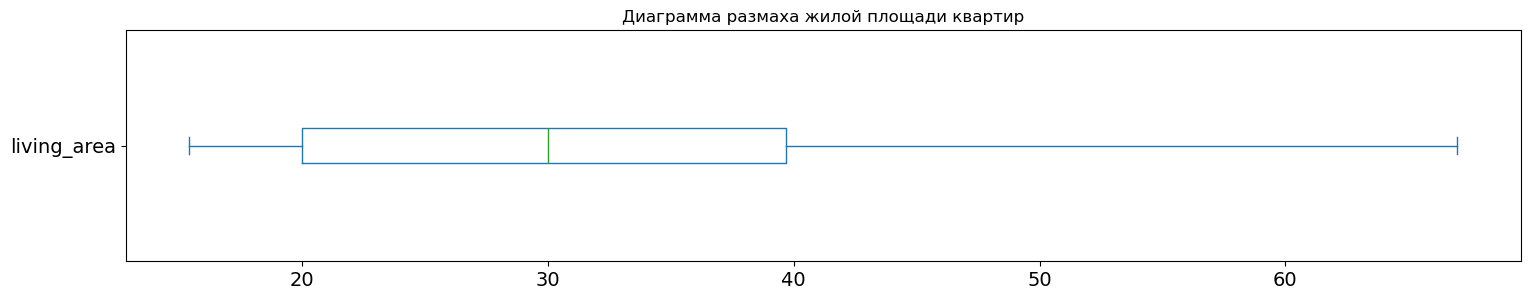

In [52]:
ax = data_filtered_living_area['living_area'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха жилой площади квартир', 
    fontsize=14)
plt.show()

In [53]:
data_filtered_living_area['living_area'].describe()

count    21134.000000
mean        31.604847
std         11.892923
min         15.410000
25%         20.000000
50%         30.000000
75%         39.700000
max         66.990000
Name: living_area, dtype: float64

**Вывод:**

После применения данного среза, значения статистических показателей жилой площади объектов недвижимости заметно изменились в лучшую сторону, стали более правдоподобными и достоверными. Средняя жилая площадь максимально приблизилась к медианной. Минимальная площадь стала более реалистичной (13 кв. метров) по сравнению с предыдущим значением в 2 кв. метра. Максимальная жилая площадь зафиксирована с новым более правдоподобным значением в 66.9 квадратных метров по сравнению с предыдущим значением в 409 кв. метров. Стандартное отклонение снизилось наполовину с 21.8 кв. метра до нормальных 11 кв. метров. Можно также сказать, как и в предыдущем случае, что в 90 процентов случаев мы будем сталкиваться с данными правдоподобными и реалистичными показателями. Делать больший срез с применением стандартного межквартильного размаха в диапазоне 0.25 - 0.75 квантилей необходимости нет.

**Площадь кухни объектов недвижимости.**

**Построим гистограму площади кухни объектов недвижимости**

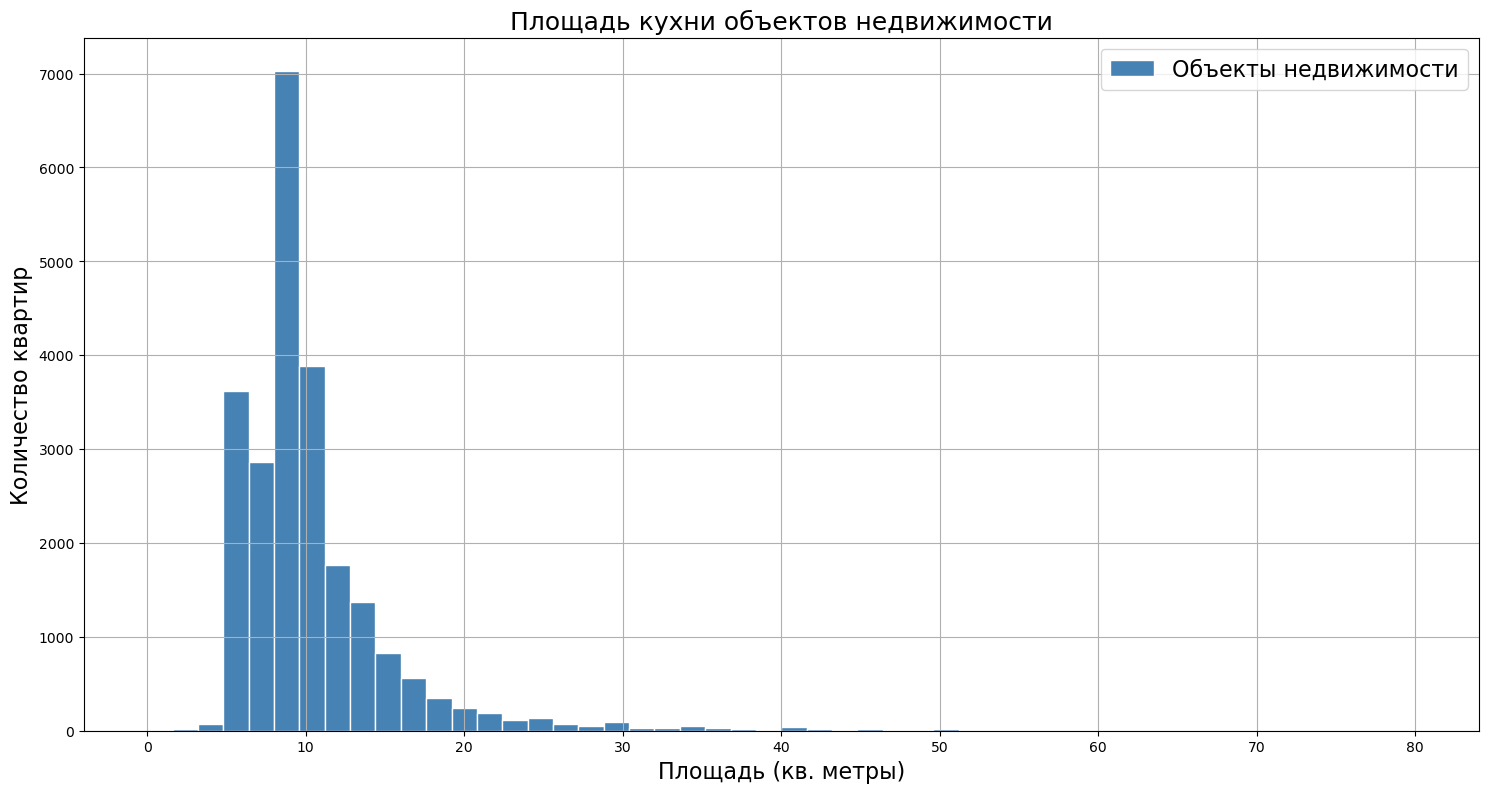

In [54]:
plt.figure(figsize=(18,9))
plt.hist(data['kitchen_area'], bins=50, range=(0, 80), color='steelblue', ec='white')
plt.title('Площадь кухни объектов недвижимости', fontsize=18)
plt.xlabel('Площадь (кв. метры)', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Построим диаграму размаха площади кухни объектов недвижимости**

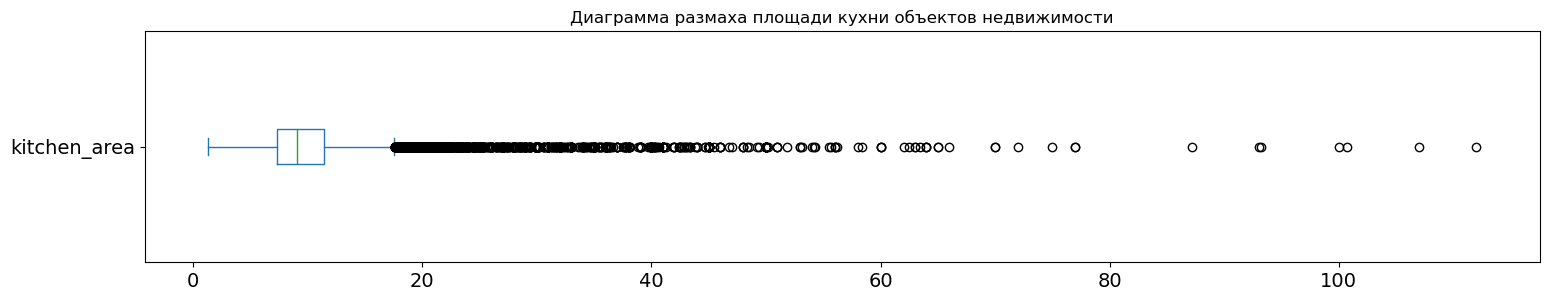

In [55]:
ax = data['kitchen_area'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха площади кухни объектов недвижимости', 
    fontsize=14)
plt.show()

**Выведем основные показатели описательной статистики по столбу kitchen_area:**

In [56]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.423234
std          5.631746
min          1.300000
25%          7.300000
50%          9.100000
75%         11.410000
max        112.000000
Name: kitchen_area, dtype: float64

**Описание наблюдений:**

Ситуация с площадью кухни аналогичная как и общей площадью, так и с жилой площадью, есть аномальные минимальные и максимальные значения, довольно высокое стандартное отклонение. Применим тот же метод по срезу с межквартильным размахом в диапазоне: 0.05 - 0.95 квантили.

Срез датафрейма по столбцу kitchen_area с межквартильным размахом в диапазоне: 0.05 - 0.95 квантили

In [57]:
q_low = data['kitchen_area'].quantile(0.05)
q_hi  = data['kitchen_area'].quantile(0.95)
data_filtered_kitchen_area = data[(data['kitchen_area'] < q_hi) & (data['kitchen_area'] > q_low)]

**Построим еще раз гистограмму и диаграму размаха для признака площади кухни объектов недвижимости**

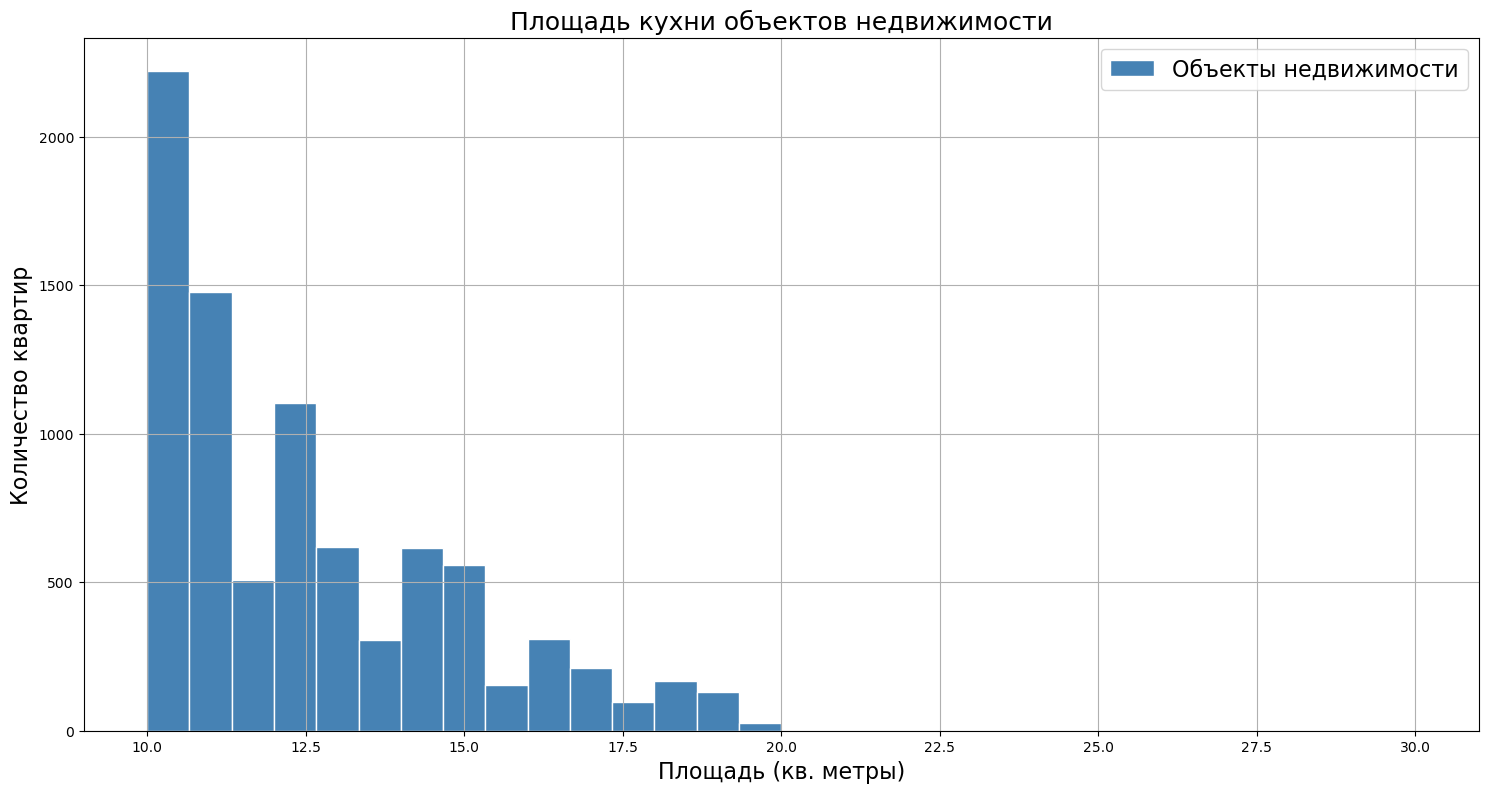

In [58]:
plt.figure(figsize=(18,9))
plt.hist(data_filtered_kitchen_area['kitchen_area'], bins=30, range=(10, 30), color='steelblue', ec='white')
plt.title('Площадь кухни объектов недвижимости', fontsize=18)
plt.xlabel('Площадь (кв. метры)', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

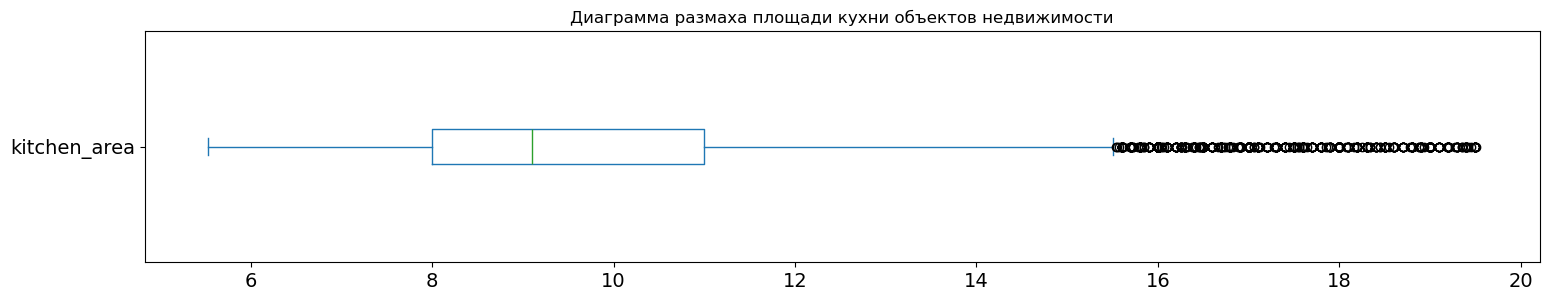

In [59]:
ax = data_filtered_kitchen_area['kitchen_area'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха площади кухни объектов недвижимости', 
    fontsize=14)
plt.show()

**Вывод:**

После применения среза показатели нормализовались: среднее значение уменьшилось и приблизилось к медианному значению, стандартное отклонение уменьшилось почти вдвое и стало правдоподобным, так как в предыдущем случае оно состовляло половину от средней площади кухни.

Максимальное и минимальное значения стали правдоподобными. В 90 процентах случаев мы будем сталкиваться с данными более точными и достоверными значениями показателей после применения межквартильного размаха к датафрейму.

**Цена объекта недвижимости.**

**Построим гистограму цен объектов недвижимости**

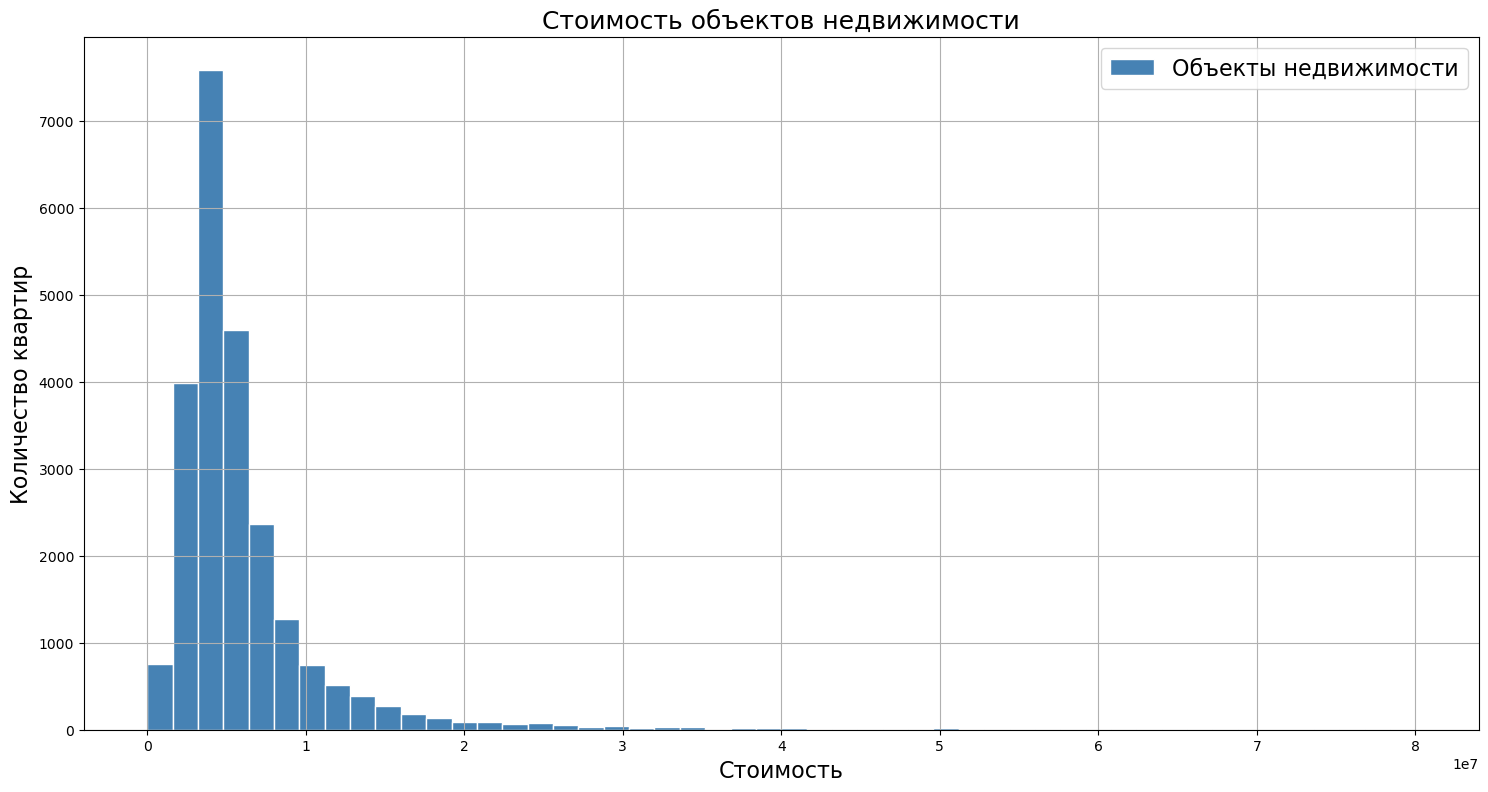

In [60]:
plt.figure(figsize=(18,9))
plt.hist(data['last_price'], bins=50, range=(0, 80000000), color='steelblue', ec='white')
plt.title('Стоимость объектов недвижимости', fontsize=18)
plt.xlabel('Стоимость', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Построим диаграму размаха цен объектов недвижимости**

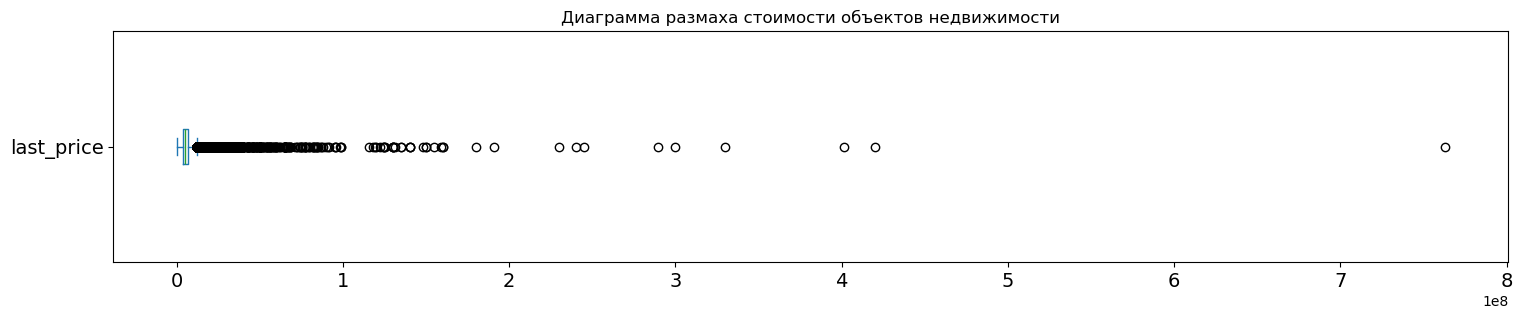

In [61]:
ax = data['last_price'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха стоимости объектов недвижимости', 
    fontsize=14)
plt.show()

**Выведем основные показатели описательной статистики по столбу last_price:**

In [62]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

**Выведем наибольшие и наименьшие по стоимости квартиры:**

In [63]:
print('Самые дорогие объекты:', data['last_price'].sort_values(ascending=False).head(15))
print()
print('Самые дешевые объекты:', data['last_price'].sort_values(ascending=True).head(15))

Самые дорогие объекты: 12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
5893     230000000.0
8900     190870000.0
19865    180000000.0
19155    160000000.0
2536     159984000.0
16495    159000000.0
1026     155000000.0
Name: last_price, dtype: float64

Самые дешевые объекты: 8793      12190.0
17456    430000.0
14911    430000.0
16274    440000.0
9581     450000.0
17676    450000.0
16219    450000.0
5698     450000.0
18867    470000.0
23484    470000.0
21912    470000.0
16032    480000.0
10782    490000.0
6859     490000.0
2097     500000.0
Name: last_price, dtype: float64


**Отдельно выведем стандартное отклонение в стоимости квартир**

In [64]:
data['last_price'].std()

10910934.7215143

**Описание наблюдений:**

На рынке недвижимости представлены самые различные квартиры по стоимости. Наименьшей ценой является объект стоимостью 12 тыс. рублей. Очевидно, что это выброс с ошибкой стоимости. Максимальная стоимость объекта составляет 763 млн. рублей. Также имеются и длугие объекты, стоимость которых исчисляется сотнями миллионов рублей. По всей видимости это объекты элитной недвижимости и ошибками не являются, хотя на рынке недвижимости они могут серьезно увеличить среднюю стоимость квартир. Сейчас средняя стоимость зафиксирована в 6.5 млн. рублей, а медианное значение стоимости составляет в 4.6 мл. рублей (или две третьих от стоимости).

Особенно аномальным выглядет стандартное отклонение в 10.9 млн. рублей. Таким образом, хвосты по самым дешевым и дорогим квартирам придется таже срезать, чтобы получить непротиворечивые и корректные данные. Применим ту же методику.

Срез датафрейма по столбцу last_price с межквартильным размахом в диапазоне: 0.05 - 0.90 квантили

In [65]:
q_low = data['last_price'].quantile(0.05)
q_hi  = data['last_price'].quantile(0.90)
data_filtered_last_price = data[(data['last_price'] < q_hi) & (data['last_price'] > q_low)]

**Построим еще раз гистограмму и диаграму размаха для признака стоимости объектов недвижимости**

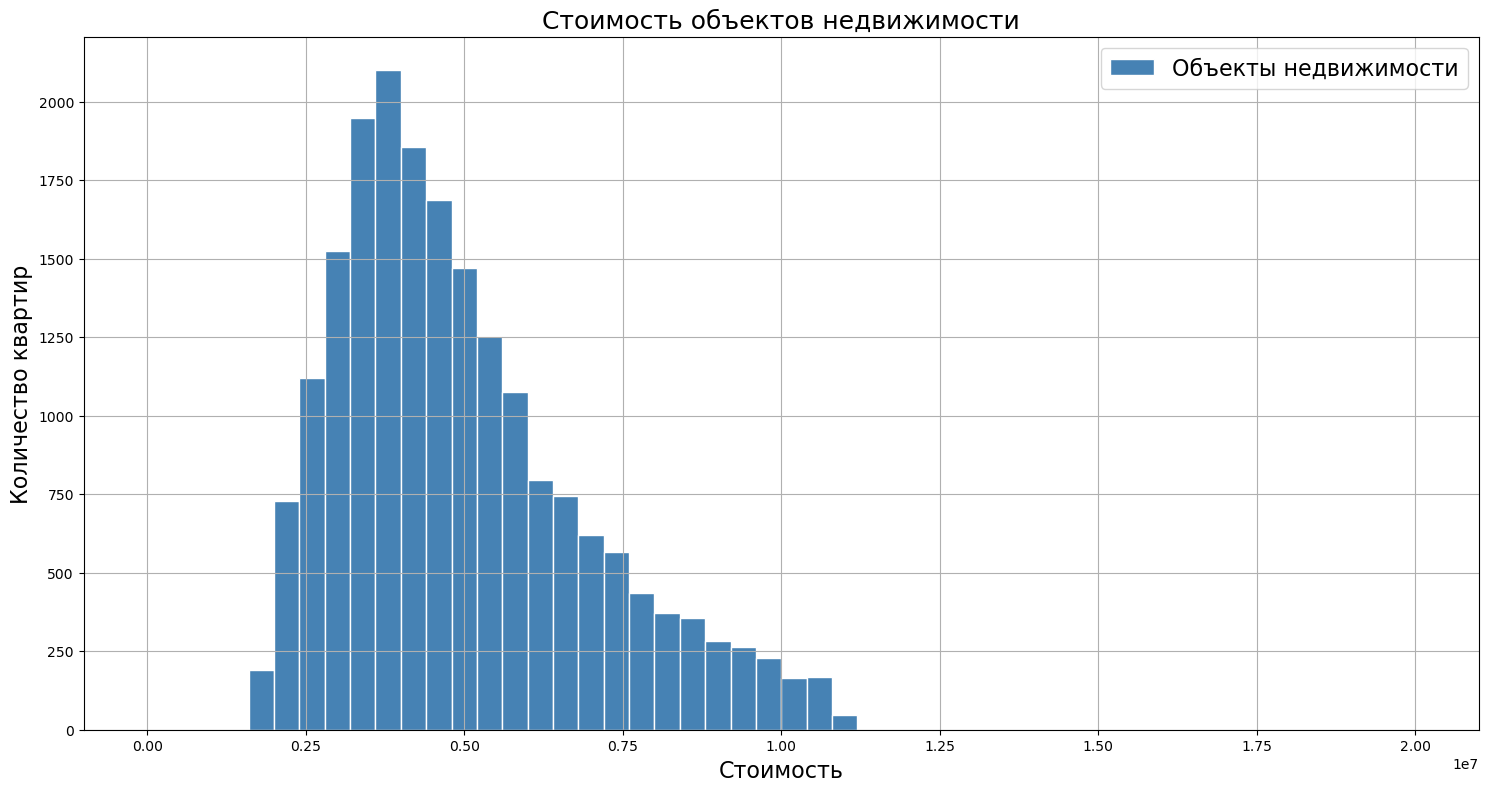

In [66]:
plt.figure(figsize=(18,9))
plt.hist(data_filtered_last_price['last_price'], bins=50, range=(0, 20000000), color='steelblue', ec='white')
plt.title('Стоимость объектов недвижимости', fontsize=18)
plt.xlabel('Стоимость', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

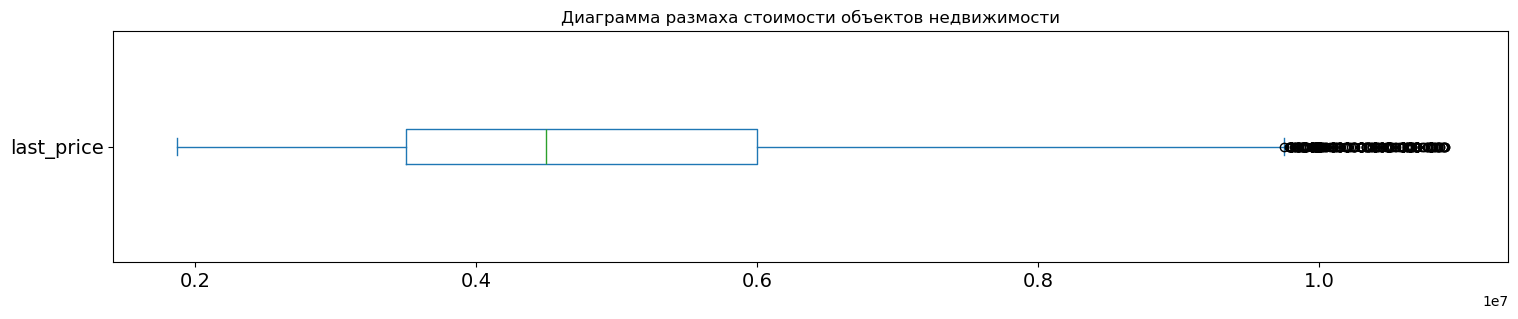

In [67]:
ax = data_filtered_last_price['last_price'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха стоимости объектов недвижимости', 
    fontsize=14)
plt.show()

**Выведем еще раз наибольшие и наименьшие по стоимости квартиры:**

In [68]:
print('Самые дорогие объекты:', data_filtered_last_price['last_price'].sort_values(ascending=False).head(15))
print()
print('Самые дешевые объекты:', data_filtered_last_price['last_price'].sort_values(ascending=True).head(15))

Самые дорогие объекты: 10604    10898000.0
1793     10895000.0
11498    10890000.0
17450    10880100.0
201      10880000.0
2048     10861350.0
14186    10860000.0
410      10850000.0
22558    10850000.0
2700     10850000.0
19293    10850000.0
9554     10828140.0
10805    10824000.0
19596    10815000.0
18394    10800000.0
Name: last_price, dtype: float64

Самые дешевые объекты: 10273    1870000.0
21419    1870000.0
6306     1870000.0
5427     1880000.0
11303    1880000.0
17588    1880000.0
22535    1880000.0
18223    1888000.0
9169     1890000.0
9016     1890000.0
1039     1890000.0
12518    1890000.0
20776    1890000.0
12077    1890000.0
15757    1890000.0
Name: last_price, dtype: float64


**Посмотрим еще раз основные показатели описательной статистики по столбу last_price:**

In [69]:
data_filtered_last_price['last_price'].describe()

count    2.000200e+04
mean     4.934307e+06
std      1.961995e+06
min      1.870000e+06
25%      3.500000e+06
50%      4.500000e+06
75%      6.000000e+06
max      1.089800e+07
Name: last_price, dtype: float64

**Вывод:**

После данного среза значения цен нормализовались. Средняя цена объекта недвижимости (4.93 млн. рублей) близка к медианному значению (4.5 млн. рублей). Стандартное отклонение уменьшилось в более чем 5 раз (1.96 млн. рублей), стало правдоподобным и не превышает как среднюю, так и медианную стоимость жилья.

Выглядят реалистичными минимальные и максимальные значения стоимости квартир 1.87 млн. рублей и 10 млн. рублей соответственно. Таким образом в 85 процентах случаев будут встречатьсяя данные реалистичные показатели. По всей видимости 85 процентов - это доля рынка недвижимости, включающая бюджетный рынок жилья, в который не входит элитная недвижимость и дешевая недвижимость (возможно аварийные или иные аномальные объекты).

**Количество комнат.**

**Построим гистограму количества комнат в объектах недвижимости**

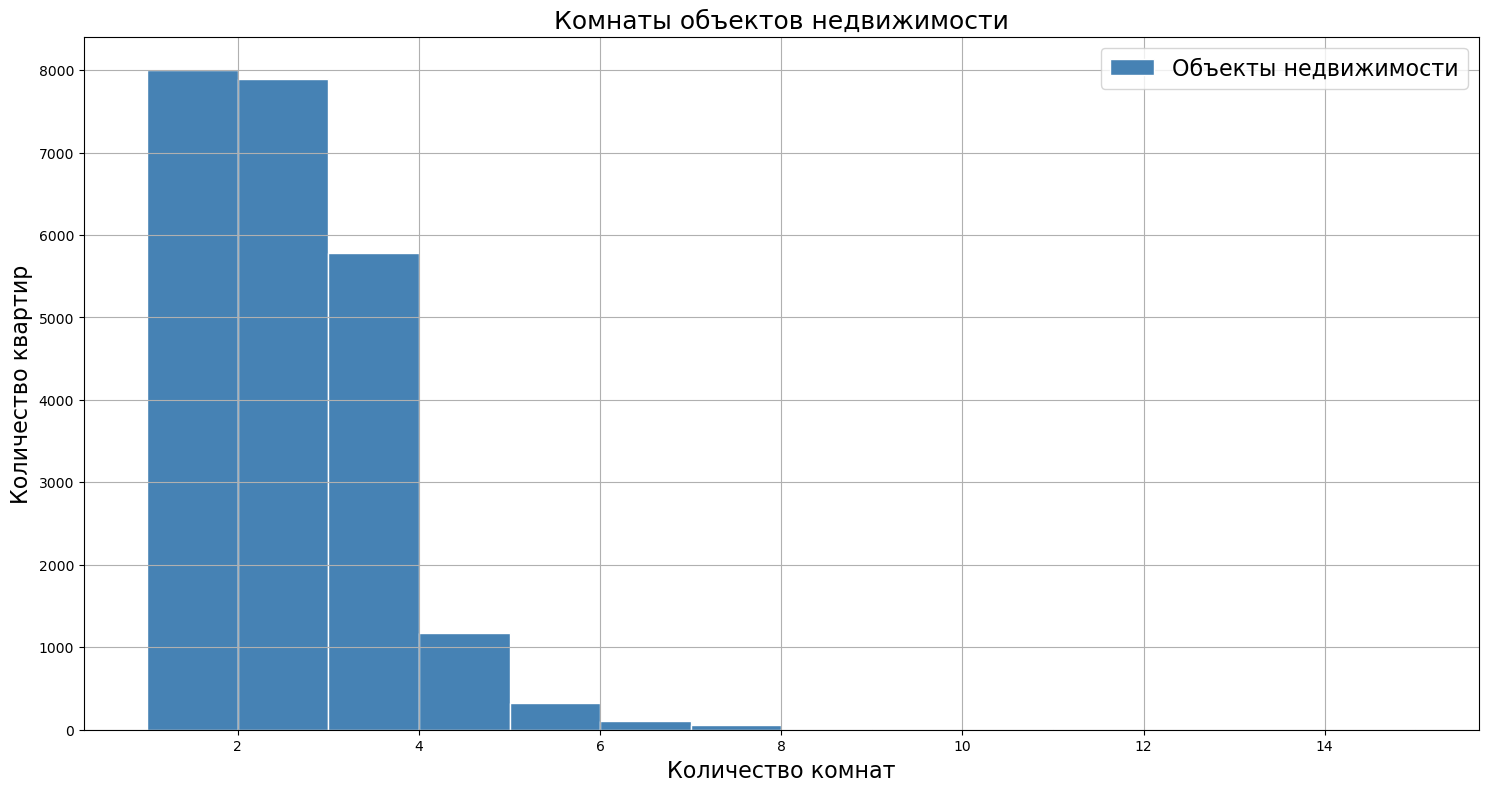

In [70]:
plt.figure(figsize=(18,9))
plt.hist(data['rooms'], bins=14, range=(1, 15), color='steelblue', ec='white')
plt.title('Комнаты объектов недвижимости', fontsize=18)
plt.xlabel('Количество комнат', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Построим диаграму размаха количества комнат в объектах недвижимости**

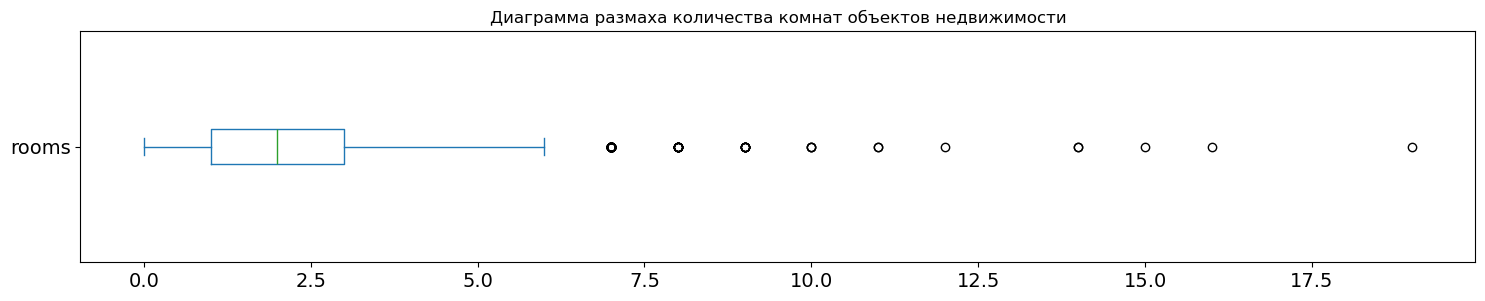

In [71]:
ax = data['rooms'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха количества комнат объектов недвижимости', 
    fontsize=14)
plt.show()

**Посчитаем общее количество значений в столце с комнатами**

In [72]:
data['rooms'].value_counts()

rooms
1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: count, dtype: int64

**Посчитаем общее количество этих же значений в процентах и посмотрим доли квартир на рынке недвижимости в зависимости от количества комнат в квартире**

In [73]:
data['rooms'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

rooms
1     34.0%
2     33.5%
3     24.5%
4      5.0%
5      1.4%
0      0.8%
6      0.4%
7      0.3%
8      0.1%
9      0.0%
10     0.0%
11     0.0%
14     0.0%
15     0.0%
19     0.0%
16     0.0%
12     0.0%
Name: proportion, dtype: object

**Выведем основные показатели описательной статистики по столбу rooms:**

In [74]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

**Описание наблюдений:**

На рынке недвижимости представлены объекты недвижимости с минисмальным количеством комнат - 1 и максимальным значением в 19 комнат. Подавляющее количество квартир - это однокомнатные и двухкомнатные квартиры, они составляют 67 процентов, или две третьих, рынка недвижимости. Также 24 процента рынка жилья составляют трехкомнатные квартиры, 5 процентов четырехкомнатные и 1.4 процент пятикомнатные квартиры.

Доля остальных объектов не превышает одного процента. Также имеется 194 объекта со значением комнат равном 0. Очевидно, что это может быть техническая ошибка или не указание собственником количеcтва комнат в объекте.

Количество квартир с количеством комнат более 5 это сверхдорогие объекты элитной недвижимости.

**Высота потолков.**

**Построим гистограму высоты потолков в объектах недвижимости**

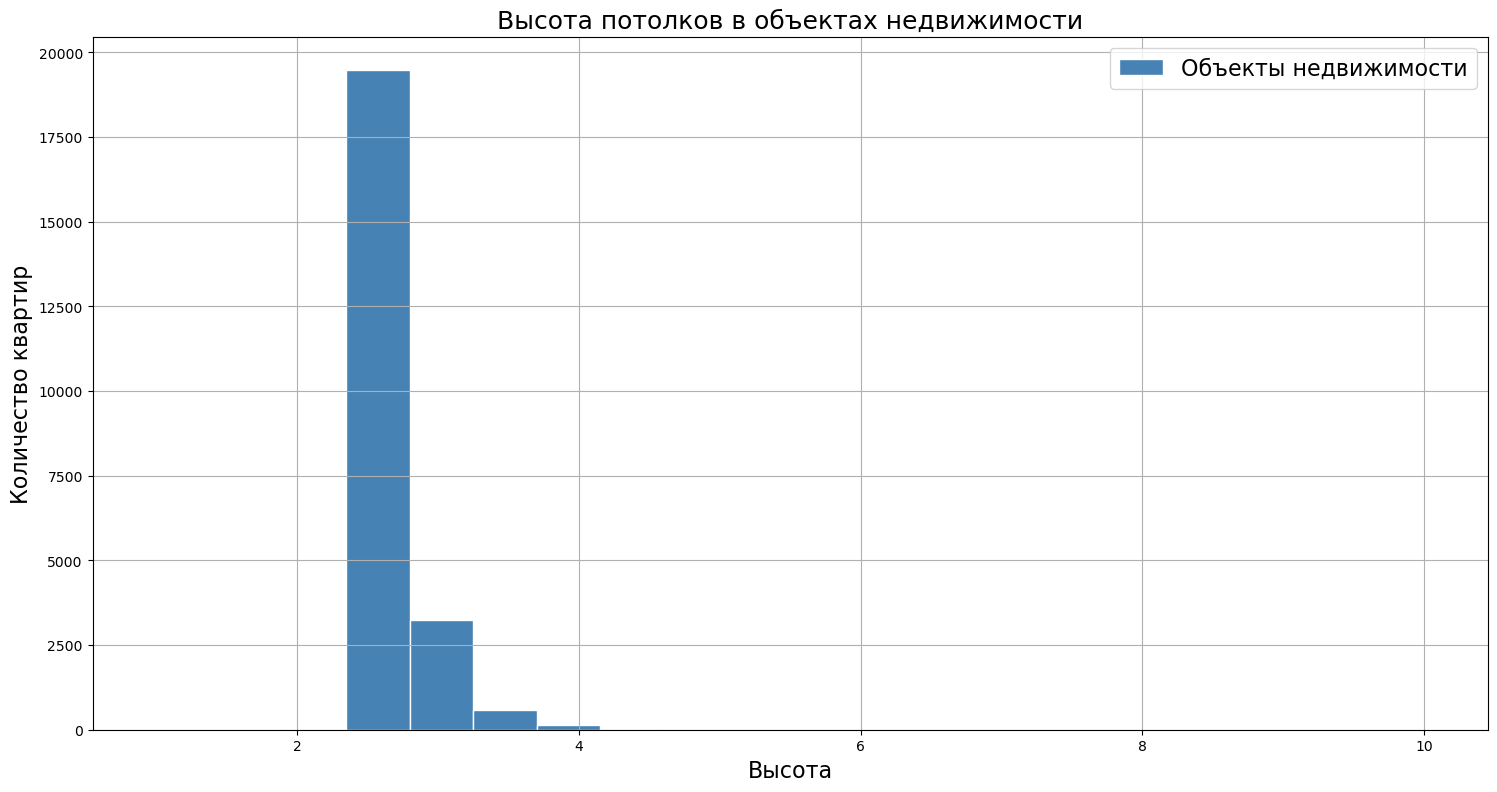

In [75]:
plt.figure(figsize=(18,9))
plt.hist(data['ceiling_height'], bins=20, range=(1, 10), color='steelblue', ec='white')
plt.title('Высота потолков в объектах недвижимости', fontsize=18)
plt.xlabel('Высота', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Построим диаграму размаха высоты потолков в объектах недвижимости**

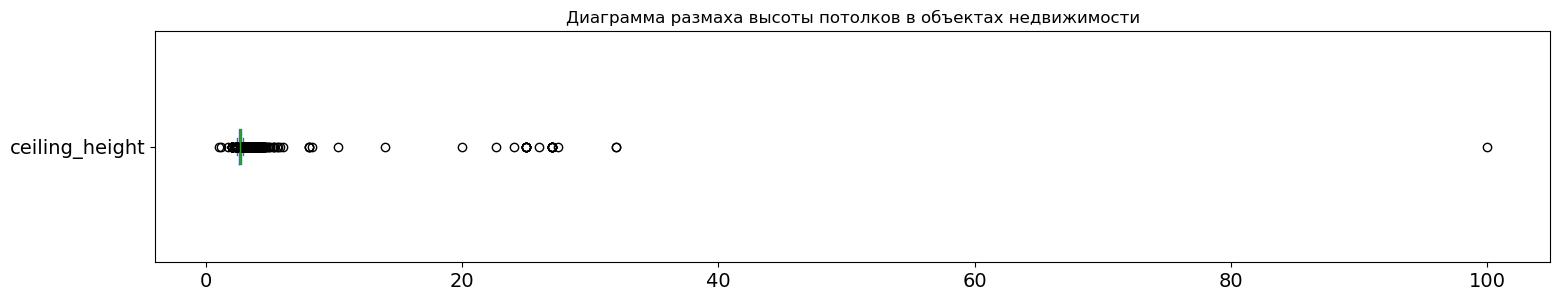

In [76]:
ax = data['ceiling_height'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха высоты потолков в объектах недвижимости', 
    fontsize=14)
plt.show()

**Выведем основные показатели описательной статистики по столбу ceiling_height:**

In [77]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

**Посмотрим уникальные значения высоты потолков:**

In [78]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

**Описание наблюдений:**

В столбце также есть аномалии - минимальная высота потолков 1 метр и максимальная 100 метров. Средняя высота потолка и меианная практически совпадают, но стандартное отклонение большое и составляет почти метр.

Имеются аномально большие значения потолков 20, 25, 32 и т. д. метров. По всей видимости это ошиба внесения сведений пользователем и неправильная запись значений - высота не 20, а 2.0 метра, не 25, а 2.5 мера. Таким образом, необходимо значений выше 20 метров поделить на 10 в датафрейме.

In [79]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

**Выведем значения потолков после обработки**

In [80]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

**Построим еще раз гистограму и диаграмму размаха высоты потолков в объектах недвижимости после среза**

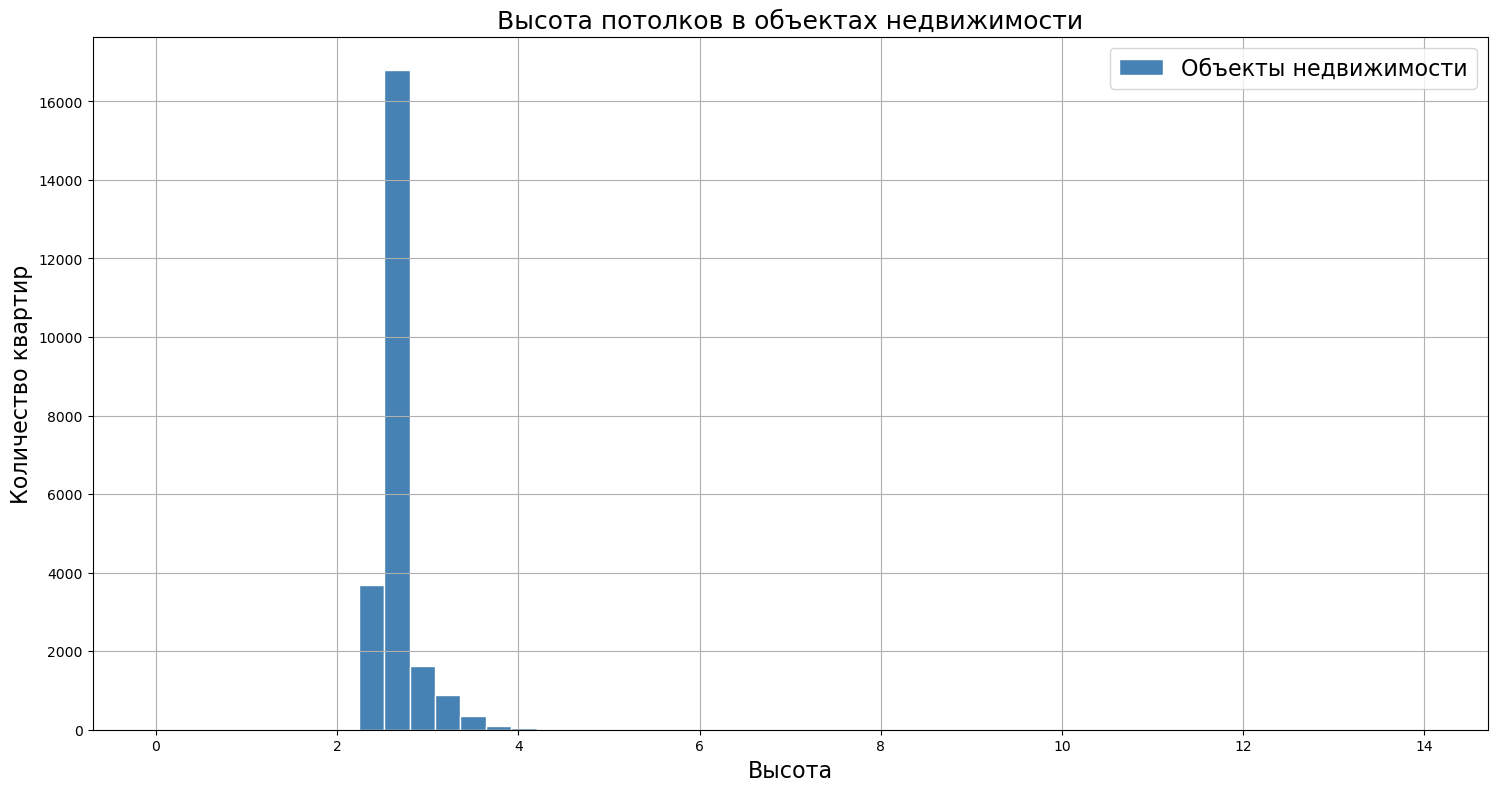

In [81]:
plt.figure(figsize=(18,9))
plt.hist(data['ceiling_height'], bins=50, range=(0, 14), color='steelblue', ec='white')
plt.title('Высота потолков в объектах недвижимости', fontsize=18)
plt.xlabel('Высота', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

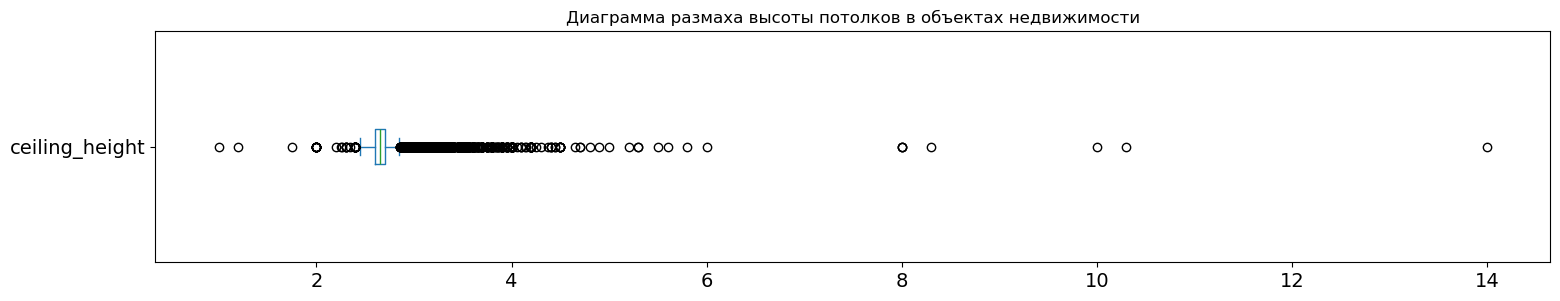

In [82]:
ax = data['ceiling_height'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха высоты потолков в объектах недвижимости', 
    fontsize=14)
plt.show()

**Выведем основные показатели описательной статистики по столбу ceiling_height:**

In [83]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.698746
std          0.253630
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

**Описание наблюдения:**

Среднее значение и медианное значение высоты потолков практически соответствуют друг другу 2.69 м. и 2.65. соответсвенно.

Но, минимальное и максимальное значение по-прежнему аномальные - 1 м. и 14 м. соответственно. Стандартное отклонение уменьшилось до допустимого значения. В данной выборке теперь содержатся правдоподобные значения высоты потолков в объектах недвижимости.

Для устранения аномалий дополнительно сделаем срез объектами недвижимости у которых потолки выше 2.2 м. и не более 3.5 м.

In [84]:
data = data.query('ceiling_height > 2.2 & ceiling_height < 3.5')

**Построим еще раз гистограму и диаграмму размаха высоты потолков в объектах недвижимости после среза**

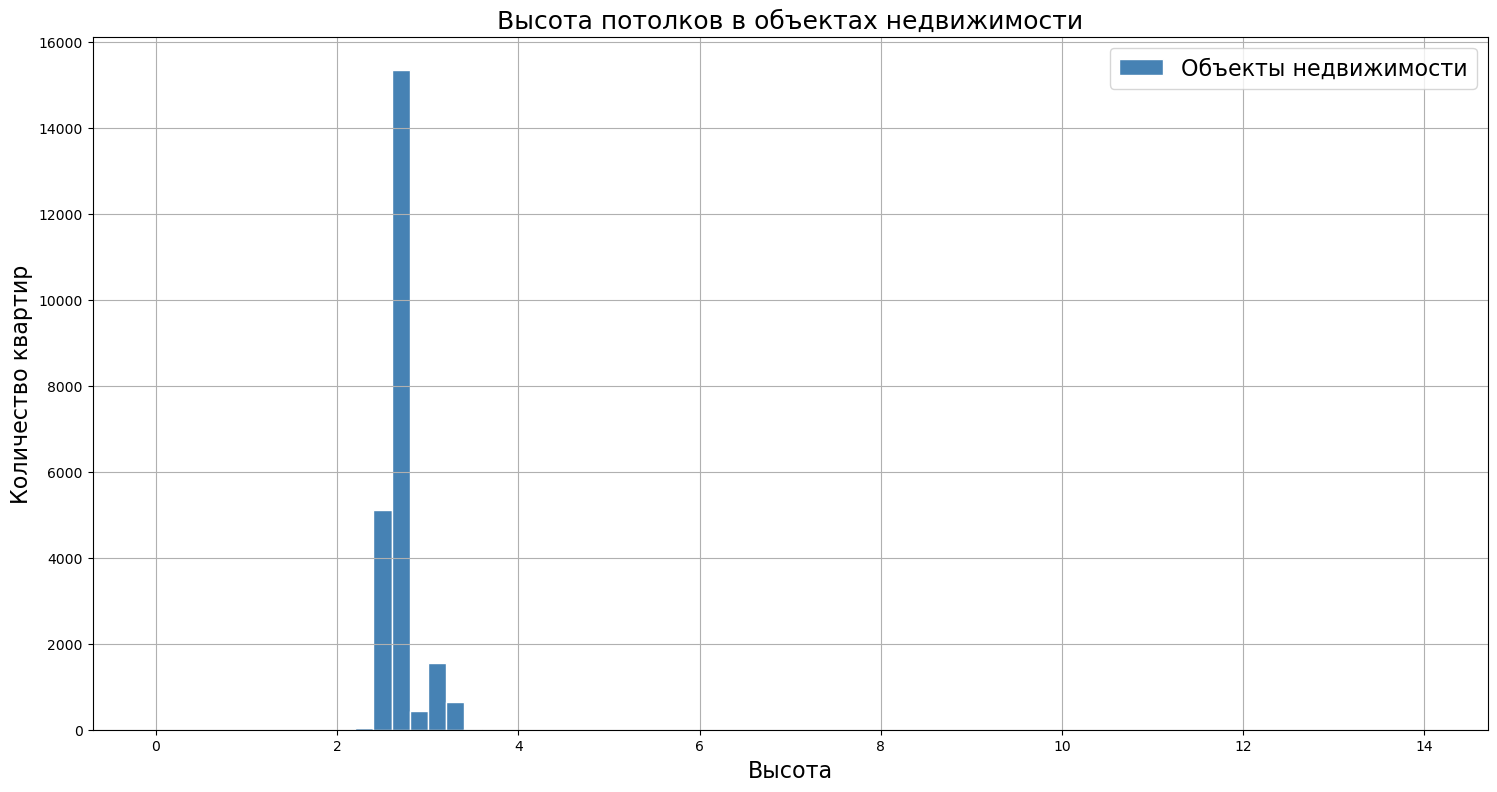

In [85]:
plt.figure(figsize=(18,9))
plt.hist(data['ceiling_height'], bins=70, range=(0, 14), color='steelblue', ec='white')
plt.title('Высота потолков в объектах недвижимости', fontsize=18)
plt.xlabel('Высота', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

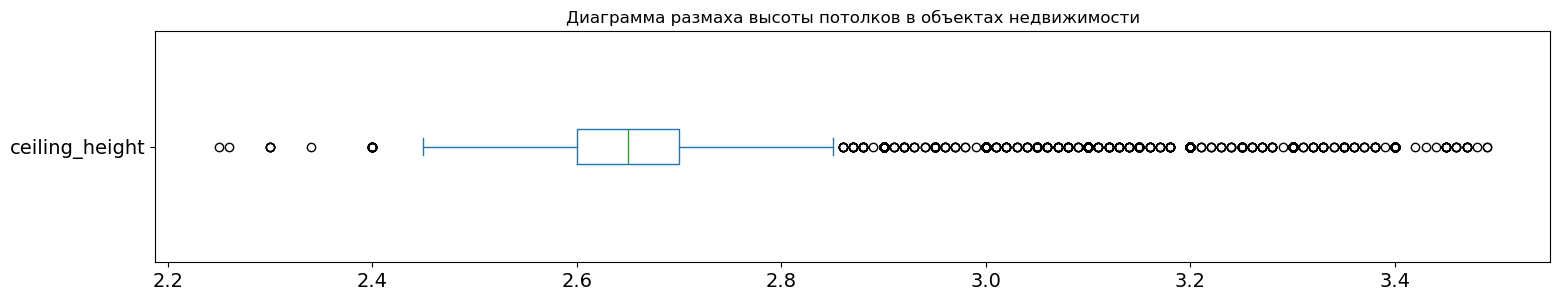

In [86]:
ax = data['ceiling_height'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха высоты потолков в объектах недвижимости', 
    fontsize=14)
plt.show()

In [87]:
data['ceiling_height'].describe()

count    23139.000000
mean         2.678820
std          0.165685
min          2.250000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.490000
Name: ceiling_height, dtype: float64

**Вывод:**

После обработки значения высоты потолков стали реальными и корректными, аномально больших значений больше нет. Среднее и медианное значения потолков 2.6 метра вполне реалистичны.

**Тип этажа квартиры («первый», «последний», «другой»)**

**Построим гистограму по типам этажей в объектах недвижимости**

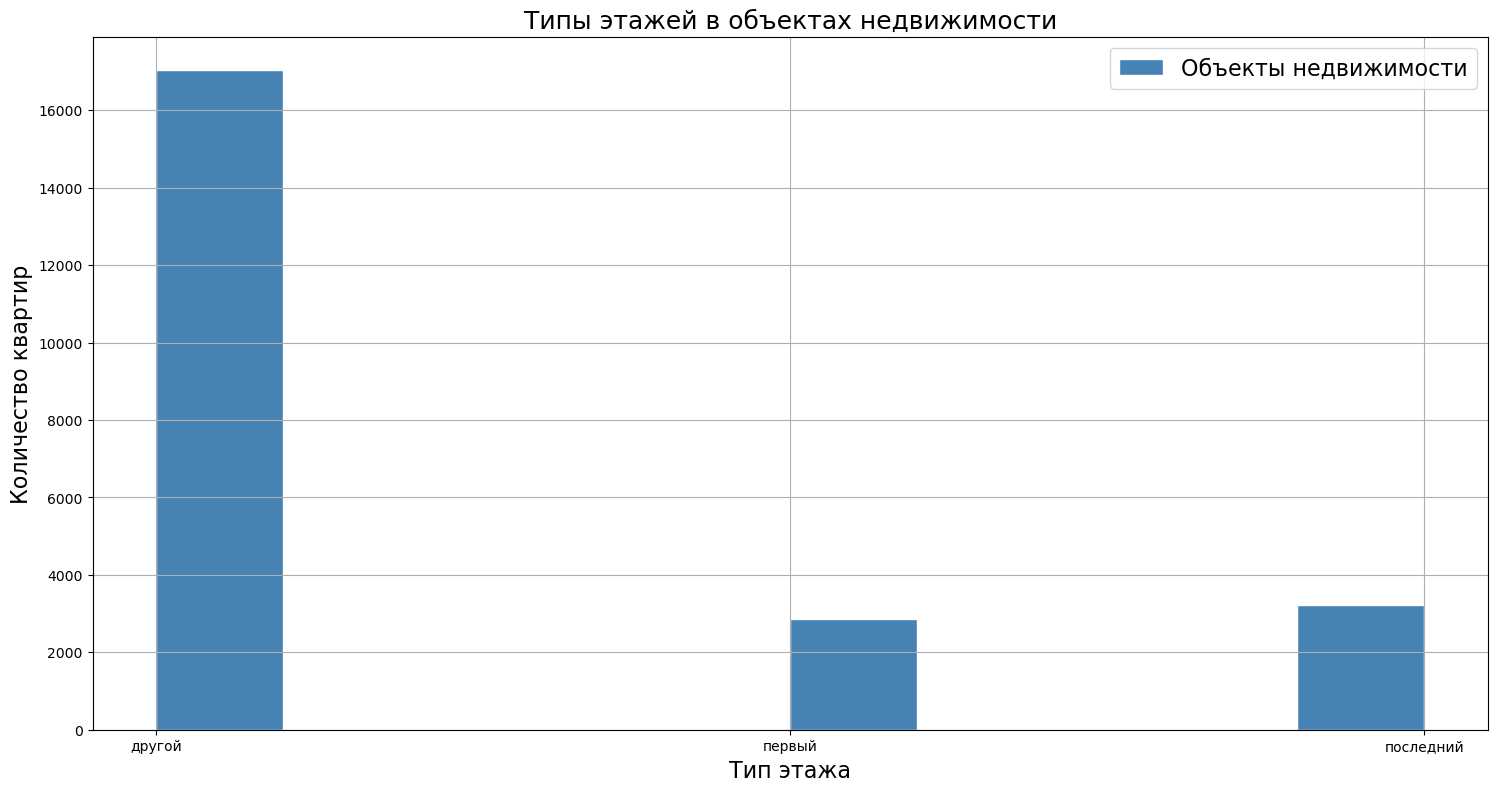

In [88]:
plt.figure(figsize=(18,9))
plt.hist(data['floor_category'], bins=10, range=(0, 2), color='steelblue', ec='white')
plt.title('Типы этажей в объектах недвижимости', fontsize=18)
plt.xlabel('Тип этажа', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Посчитаем количество категорий объектов по типам этажей**

In [89]:
data['floor_category'].value_counts()

floor_category
другой       17050
последний     3232
первый        2857
Name: count, dtype: int64

**Выведем долю объектов недвижимости по категориям**

In [90]:
data['floor_category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

floor_category
другой       73.7%
последний    14.0%
первый       12.3%
Name: proportion, dtype: object

**Описание наблюдений:**

Чуть больше четверти всех объектов (26.3 процентов) составляет недвижимость, расположенная на первом и последнем этажах. Объектов с первым и последним этажами примерно поровну. Остальная недвижимость составляет подавляющее большинство или 73.7 процента.

**Общее количество этажей в доме.**

**Построим гистограму по количеству этажей в объектах недвижимости**

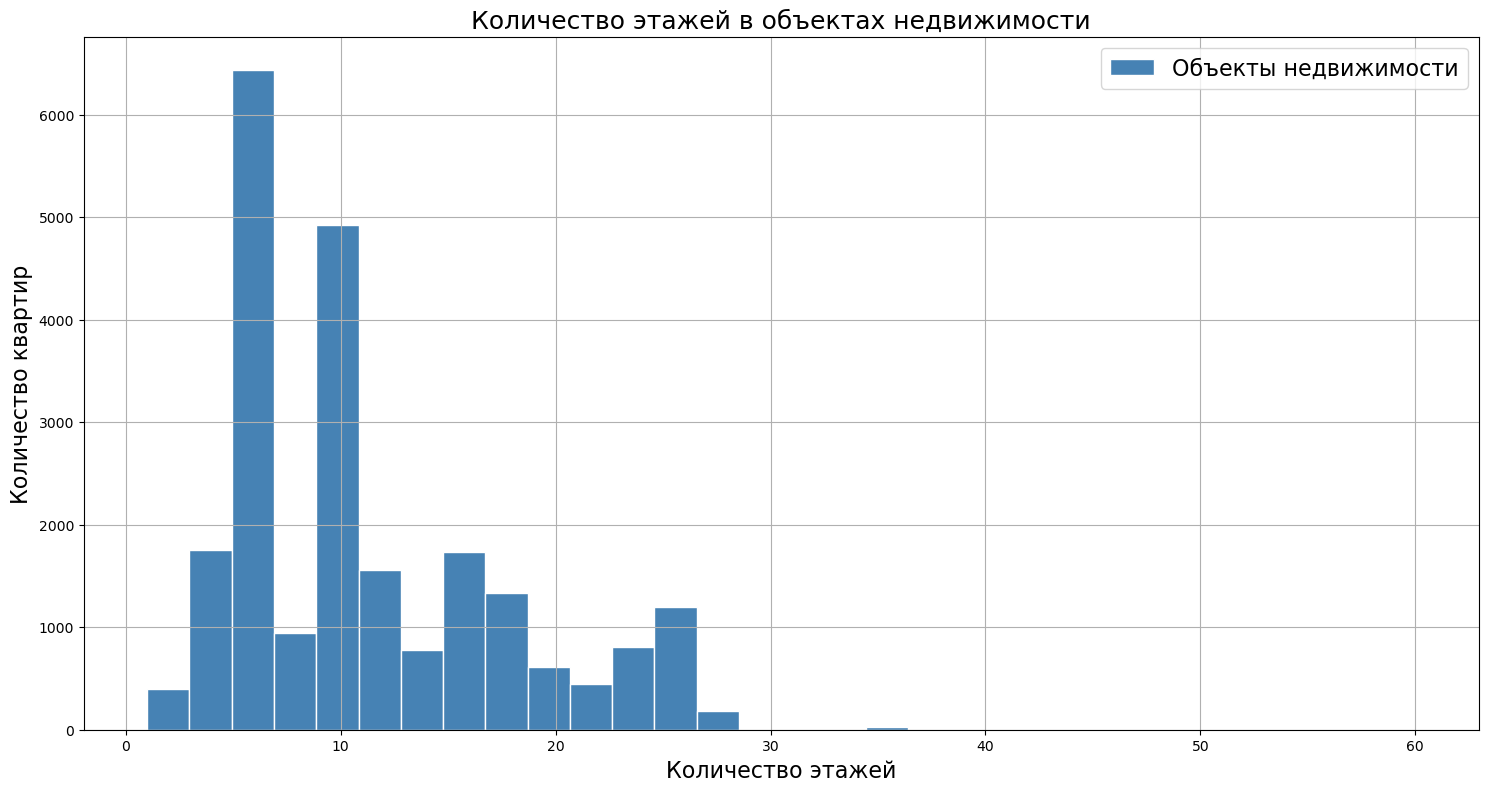

In [91]:
plt.figure(figsize=(18,9))
plt.hist(data['floors_total'], bins=30, range=(1, 60), color='steelblue', ec='white')
plt.title('Количество этажей в объектах недвижимости', fontsize=18)
plt.xlabel('Количество этажей', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Построим диаграму размаха этажности объектов недвижимости**

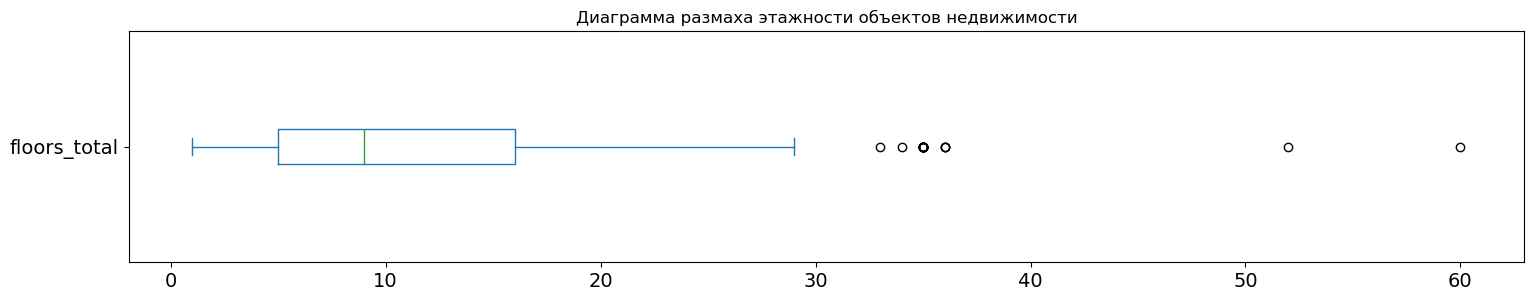

In [92]:
ax = data['floors_total'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха этажности объектов недвижимости', 
    fontsize=14)
plt.show()

**Выведем основные показатели описательной статистики по столбу floors_total:**

In [93]:
data['floors_total'].describe()

count    23139.000000
mean        10.770647
std          6.605049
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

**Посчитаем количество объектов недвижимости по количеству этажей**

In [94]:
data['floors_total'].value_counts(ascending=False)

floors_total
5     5627
9     3752
16    1371
12    1358
10    1171
4     1117
25    1074
17     830
6      813
3      632
7      561
14     552
18     504
24     462
8      384
2      368
15     364
23     349
19     339
22     286
20     271
13     229
11     202
27     164
21     158
26     123
1       25
35      24
28      21
36       3
34       1
60       1
29       1
33       1
52       1
Name: count, dtype: int64

**Выведем долю объектов недвижимости по этажности зданий**

In [95]:
data['floors_total'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

floors_total
5     24.3%
9     16.2%
16     5.9%
12     5.9%
10     5.1%
4      4.8%
25     4.6%
17     3.6%
6      3.5%
3      2.7%
7      2.4%
14     2.4%
18     2.2%
24     2.0%
8      1.7%
2      1.6%
15     1.6%
23     1.5%
19     1.5%
22     1.2%
20     1.2%
13     1.0%
11     0.9%
27     0.7%
21     0.7%
26     0.5%
1      0.1%
35     0.1%
28     0.1%
36     0.0%
34     0.0%
60     0.0%
29     0.0%
33     0.0%
52     0.0%
Name: proportion, dtype: object

**Описание наблюдений:**

Чуть более 40 процентов рынка недвижимости составляют 5 и 9 этажные дома. Присутствуют также и аномальные значения с домами в 60 и 52 этажа. Таких высотных зданий с Санкт_петербурге скорее всего нет.

**Расстояние до центра города в метрах**

**Построим гистограму расстояния от центра города до объекта недвижимости**

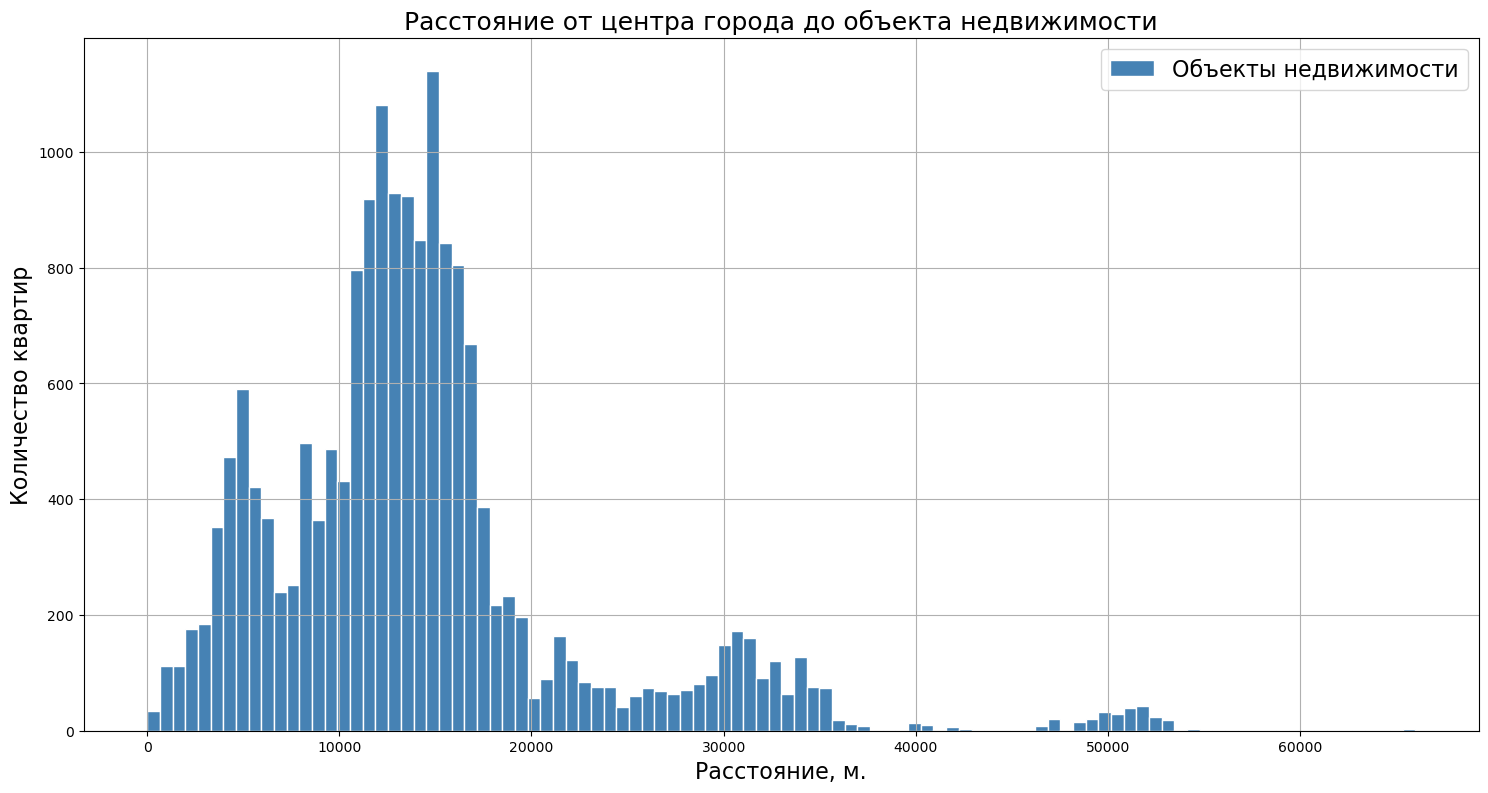

In [96]:
plt.figure(figsize=(18,9))
plt.hist(data['city_centers_nearest'], bins=100, range=(0, 66000), color='steelblue', ec='white')
plt.title('Расстояние от центра города до объекта недвижимости', fontsize=18)
plt.xlabel('Расстояние, м.', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Построим диаграму размаха расстояния до центра города от объектов недвижимости**

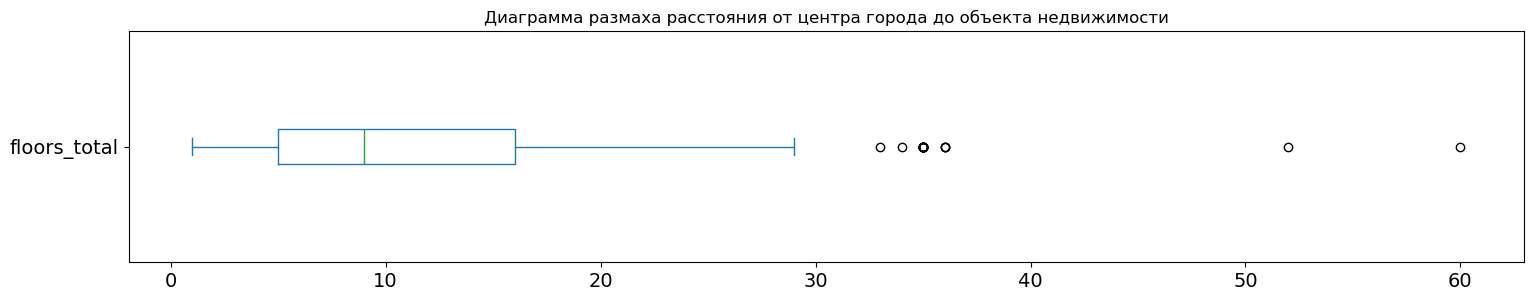

In [97]:
ax = data['floors_total'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха расстояния от центра города до объекта недвижимости', 
    fontsize=14)
plt.show()

**Выведем основные показатели описательной статистики по столбу city_centers_nearest:**

In [98]:
data['city_centers_nearest'].describe()

count    17667.000000
mean     14370.985340
std       8541.176644
min        181.000000
25%       9594.000000
50%      13218.000000
75%      16361.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

**Описание наблюдений:**

Минимальное расстояние объекта до центра составляет 181 метр, т. е. данный объект расположен в центре. Максимальное удаление составляет 65 км. Как видно из гистограммы, большинство объектов расположены в диапазоне удаленности от центра на 10-15 км. Также среднее и медианное значения удаленности составляют 14.1 и 13.0 км.

Необходимо также помнить, что в сотлбце city_centers_nearest более 5 тыс. пропущенных значений, которые могут повлиять на значение показателей описательной статистики, т. е. увеличить или уменьшить их значения.

**Расстояние до ближайшего парка.**

**Построим гистограму расстояния до ближайшего парка от объекта недвижимости**

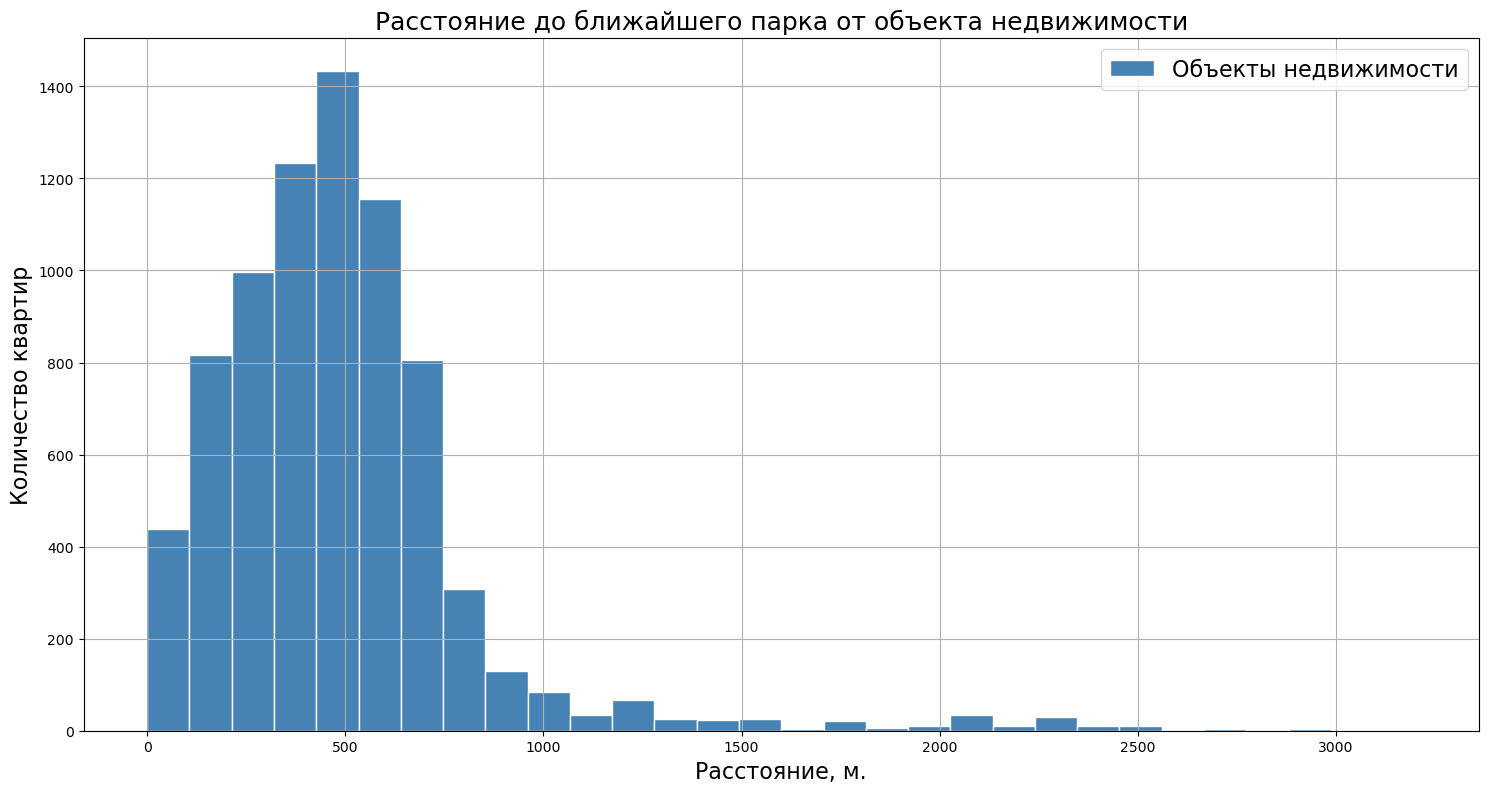

In [99]:
plt.figure(figsize=(18,9))
plt.hist(data['parks_nearest'], bins=30, range=(0, 3200), color='steelblue', ec='white')
plt.title('Расстояние до ближайшего парка от объекта недвижимости', fontsize=18)
plt.xlabel('Расстояние, м.', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Построим диаграму размаха расстояния до ближайшего парка от объектов недвижимости**

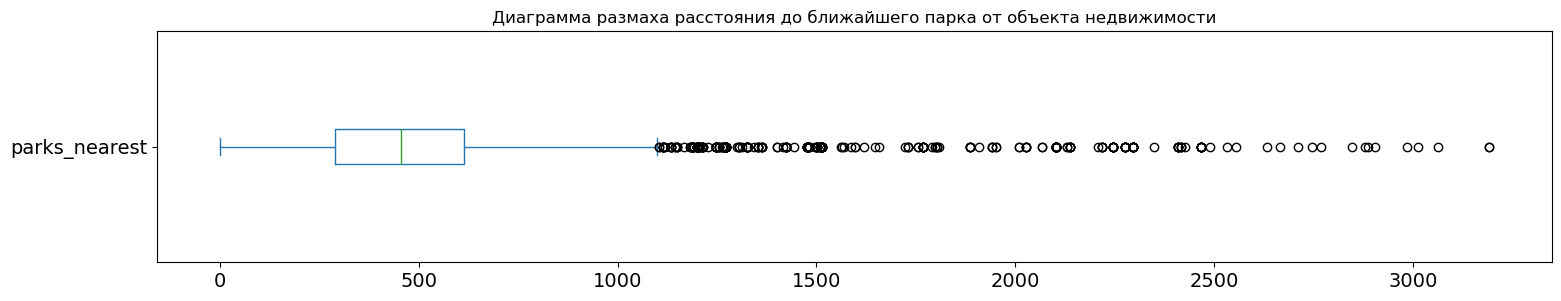

In [100]:
ax = data['parks_nearest'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха расстояния до ближайшего парка от объекта недвижимости', 
    fontsize=14)
plt.show()

**Выведем основные показатели описательной статистики по столбу parks_nearest:**

In [101]:
data['parks_nearest'].describe()

count    7727.000000
mean      493.298046
std       344.398551
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

**Описание наблюдений:**

Как видно исходя из минимальных и максимальных значений, имеются объекты недвижимости, расположенные рядом с парком и далеко от парка (самое дальнее расположение свыше 3 км.). Среднее и медианное значения практически совпадают и составляют 490 и 455 метров соответственно.

##### Изучение сроков продаважи квартир (столбец days_exposition)

**Гистограма времени продажи**

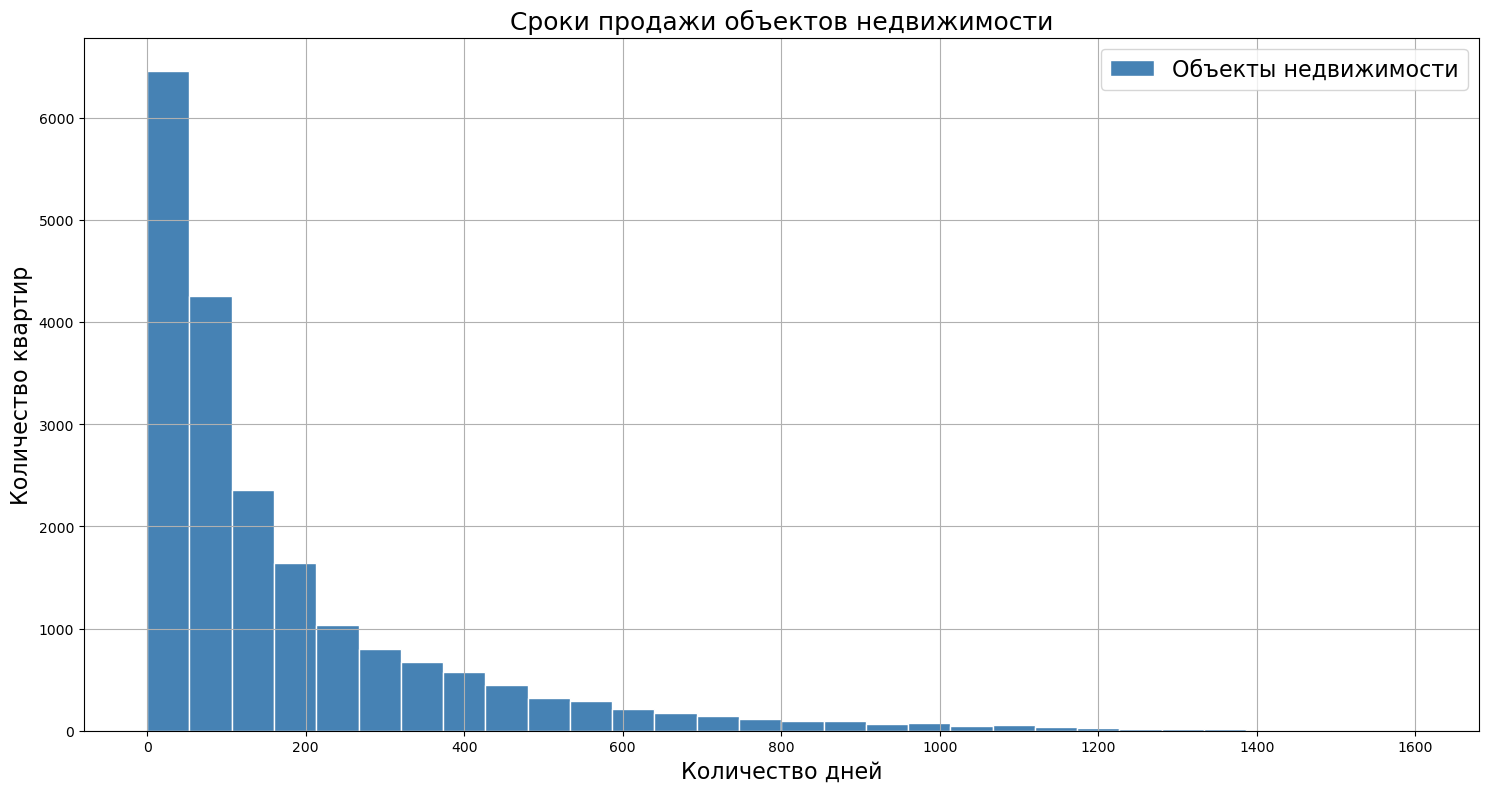

In [102]:
plt.figure(figsize=(18,9))
plt.hist(data['days_exposition'], bins=30, range=(0, 1600), color='steelblue', ec='white')
plt.title('Сроки продажи объектов недвижимости', fontsize=18)
plt.xlabel('Количество дней', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Построим диаграму размаха по срокам продажи объектов недвижимости**

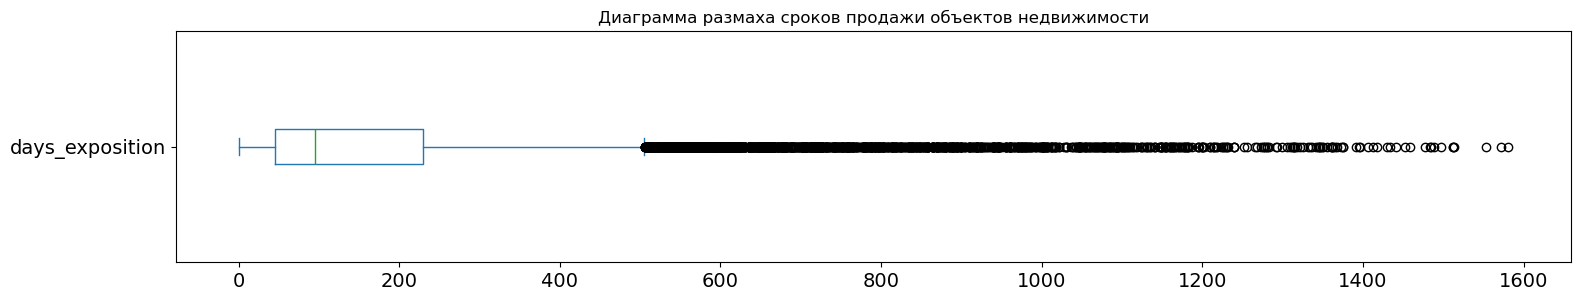

In [103]:
ax = data['days_exposition'].plot(
    kind='box', 
    vert=False,    
    figsize=(18, 3), 
    title = 'Диаграмма размаха сроков продажи объектов недвижимости', 
    fontsize=14)
plt.show()

**Выведем основные показатели описательной статистики по столбу days_exposition:**

In [104]:
data['days_exposition'].describe()

count    20068.000000
mean       179.392765
std        218.394024
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Выведем долю по срокам продажи недвижимости (первые 30 наибольших значений)**

In [105]:
data['days_exposition'].value_counts(normalize=True).head(30)

days_exposition
45.0    0.043552
60.0    0.026560
7.0     0.011561
30.0    0.010215
90.0    0.009617
4.0     0.008571
3.0     0.007823
5.0     0.007475
14.0    0.007126
9.0     0.006926
20.0    0.006827
8.0     0.006777
44.0    0.006727
11.0    0.006677
13.0    0.006279
10.0    0.006279
18.0    0.006229
28.0    0.006179
21.0    0.006129
22.0    0.006079
6.0     0.006029
15.0    0.006029
29.0    0.005980
19.0    0.005980
35.0    0.005830
24.0    0.005731
17.0    0.005681
42.0    0.005631
34.0    0.005581
54.0    0.005481
Name: proportion, dtype: float64

**Описание наблюдений:**

Согласно гистограмме, большая часть объектов недвижимости продается в диапазоне от публикации до 100 дней. Среди наиболее часто встречающихся сроков продажи квартир - 45 дней (4 процента объектов), 60 дней (2 процента объектов), за 30 дней и 7 дней продано по 1 проценту объектов. В целом разброс по количеству дней очень большой. Остальные продажи объектов по дням не превышают 1 процента.

Среднее значение срока продажи в 180 дней вдвое превышает медианное значение в 95 дней. Это является следствием большого количества аномально долго размещенных объявлений. Максимальное значение сроков продажи 1580 дней. Также имеется большое стандартное отклонение в 219 дней.

Будем считать выбросами значения, превышающие медианное значение. Сделаем выборку объектов, длительность продажи которых не превышает 95 дней.

In [106]:
data_filtered_ceiling_height = data.query('days_exposition < 95')
data_filtered_ceiling_height['days_exposition'].describe()

count    10029.000000
mean        43.091834
std         25.512443
min          1.000000
25%         21.000000
50%         45.000000
75%         61.000000
max         94.000000
Name: days_exposition, dtype: float64

**Выводы:**

Данная выборка показала, что число включенных квартир снизилось вдвое с 20394 до 10152 (то есть ровно вдвое). Таким образом, по результатам полученной выборки выявлено, что число нормальных продаж квартир со сроком до 95 дней составляет 50 проценов, остальные 50 процентов квартир продаются с длительными сроками в интервале от трех месяцев и более.

##### Факторы, которые больше всего влияют на общую (полную) стоимость объекта.

**Вычислим корреляцию для всех числовых столбцов**

In [107]:
data.corr(numeric_only=True)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_square_price,weekday_exposition,month_exposition,year_exposition,city_centers_nearest_km
total_images,1.000000,0.096329,0.114310,0.099716,0.042442,0.012544,0.104625,0.034382,0.037611,-0.027324,-0.024278,0.102295,0.047421,-0.001392,-0.045450,0.033725,-0.004284,0.009757,-0.003572,-0.028813,0.128669,-0.009038,0.005440,0.141405,-0.044941
last_price,0.096329,1.000000,0.639292,0.347677,0.245485,0.011047,0.515505,0.038028,-0.000380,-0.025414,-0.013511,0.427348,0.012489,-0.019719,-0.196993,0.185198,-0.010207,0.208002,-0.082086,0.069085,0.726610,0.003679,0.003388,-0.038601,-0.197372
total_area,0.114310,0.639292,1.000000,0.756880,0.345331,-0.055828,0.865308,-0.013221,-0.008274,-0.075858,-0.044206,0.566255,0.017377,-0.021626,-0.215741,0.183512,-0.008486,0.201648,-0.100256,0.140057,0.295480,-0.001513,0.005425,-0.075629,-0.215839
rooms,0.099716,0.347677,0.756880,1.000000,0.203500,-0.219915,0.817870,-0.147142,-0.004425,-0.148750,-0.088978,0.234654,-0.010266,-0.055787,-0.167089,0.141688,-0.047441,0.114403,-0.057844,0.118578,0.039496,-0.002464,-0.002930,-0.051308,-0.166767
ceiling_height,0.042442,0.245485,0.345331,0.203500,1.000000,-0.022650,0.308118,-0.008203,-0.039883,0.011377,-0.000744,0.320384,-0.017919,-0.071569,-0.283453,0.217635,-0.046323,0.204667,-0.108070,0.104603,0.283556,-0.021929,-0.003802,-0.051567,-0.283790
floors_total,0.012544,0.011047,-0.055828,-0.219915,-0.022650,1.000000,-0.151345,0.676744,-0.005825,0.071057,0.051301,0.175638,0.169651,0.103788,0.000390,-0.147659,0.091416,-0.037258,0.031752,-0.047936,0.175229,0.011397,0.016931,0.006266,-0.000336
living_area,0.104625,0.515505,0.865308,0.817870,0.308118,-0.151345,1.000000,-0.087367,-0.013737,-0.057989,-0.033926,0.387742,-0.003000,-0.049562,-0.205224,0.187136,-0.042017,0.172509,-0.073926,0.132354,0.194415,-0.002485,-0.001266,-0.071504,-0.205259
floor,0.034382,0.038028,-0.013221,-0.147142,-0.008203,0.676744,-0.087367,1.000000,-0.008761,0.036302,0.036122,0.140832,0.168071,0.069827,-0.002980,-0.098876,0.069232,-0.021509,0.021173,-0.036728,0.147144,0.010177,0.020815,0.004624,-0.003505
is_apartment,0.037611,-0.000380,-0.008274,-0.004425,-0.039883,-0.005825,-0.013737,-0.008761,1.000000,0.002615,0.001450,-0.013308,-0.158114,0.007338,-0.003062,0.000031,-0.017350,-0.009647,0.021844,-0.060217,0.005754,0.009695,0.110445,0.216705,-0.003686
studio,-0.027324,-0.025414,-0.075858,-0.148750,0.011377,0.071057,-0.057989,0.036302,0.002615,1.000000,-0.004232,-0.017809,0.030593,-0.022032,-0.006798,-0.034017,0.009359,-0.010147,0.000467,-0.020859,0.017952,-0.001870,-0.001370,0.010726,-0.007248


**Выведем тепловую карту корреляции датафрейма.**

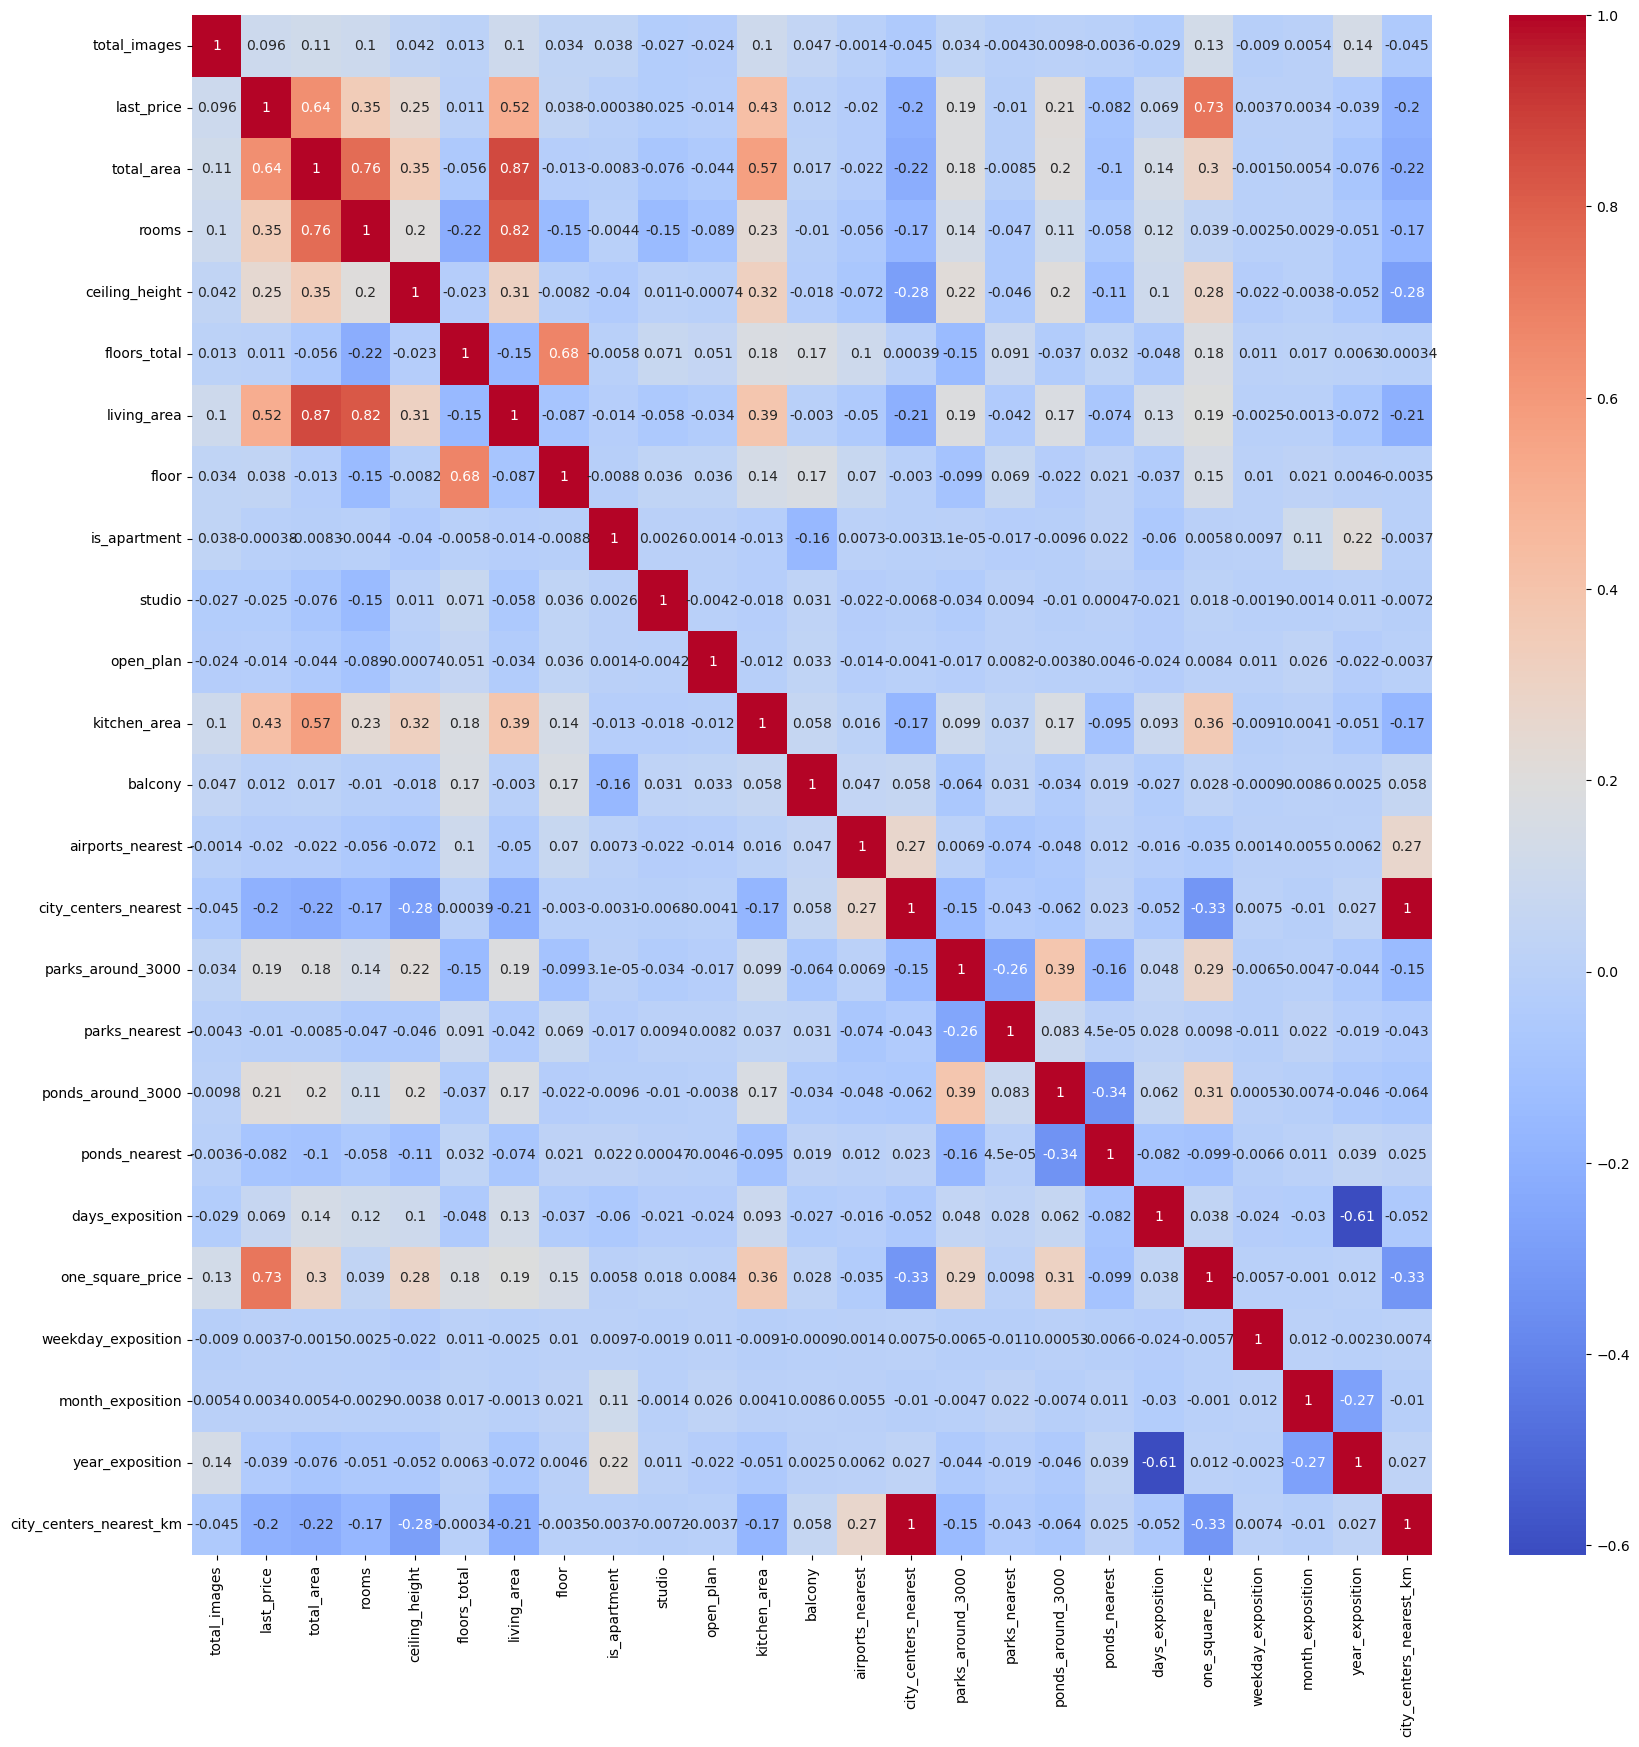

In [108]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2g', cmap='coolwarm')
plt.show(close=None, block=None)

**Зависимость стоимости объекта от его общей площади.**

In [109]:
data['last_price'].corr(data['total_area'])

0.6392922583393879

**Выведем диаграму рассеяния коэффициента корреляции**

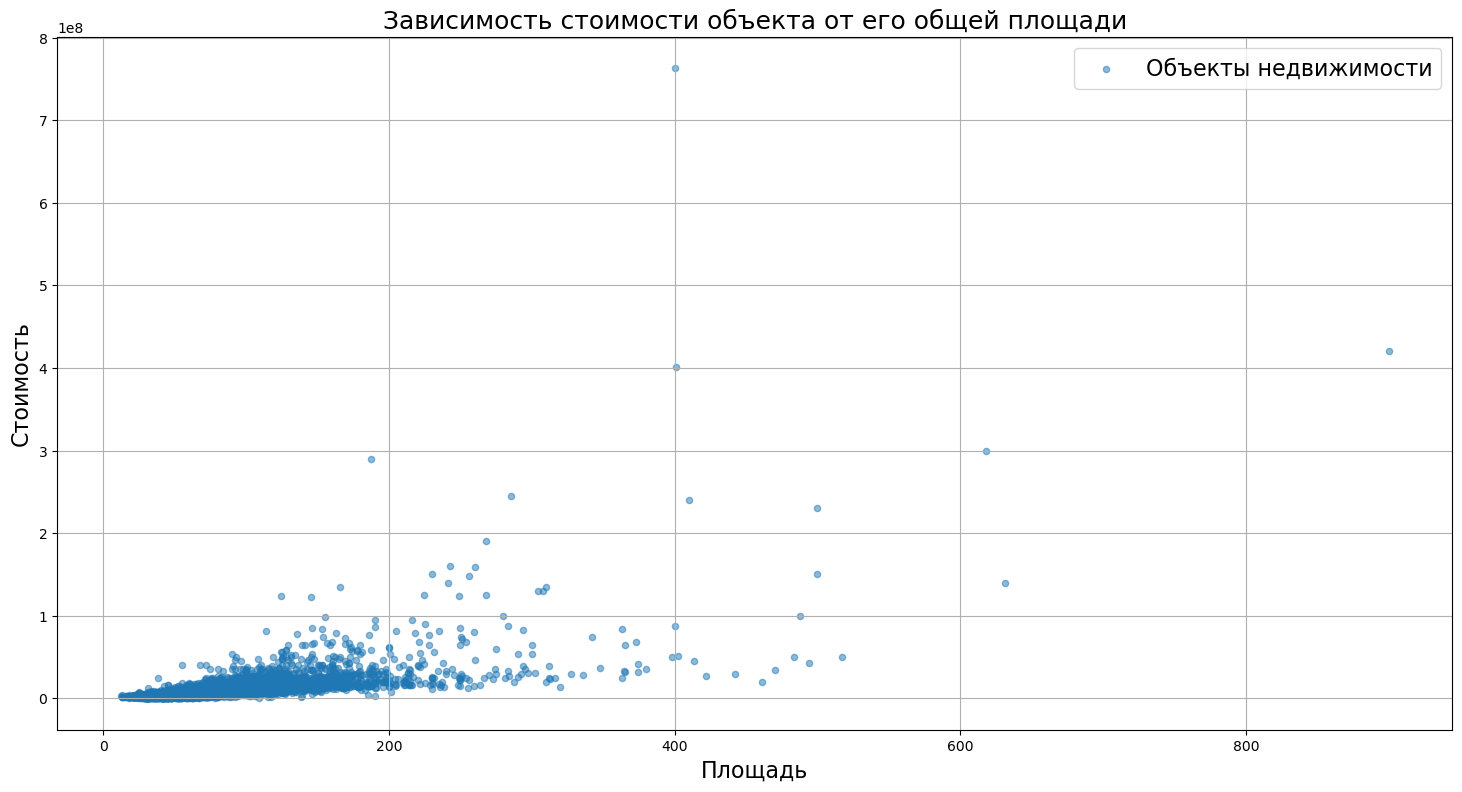

In [110]:
data.plot(x='total_area', y='last_price', kind='scatter', figsize=(18, 9), alpha=0.5)
plt.title('Зависимость стоимости объекта от его общей площади', fontsize=18)
plt.xlabel('Площадь', fontsize=16)
plt.ylabel('Стоимость', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Описание наблюдения:**

Связь между двумя переменными. Коэффициен корреляции 0.65 - средний. Построенная диаграма рассеяния нам это тоже показывает - при увеличеснии площади квартиры происходит и увеличение стоимости квартиры. Эту закономерность нужно обязательно учитывать при анализе рынка недвижимости и стоимости квартир.

**Зависимость стоимости объекта от его жилой площади**

**Посчитаем отдельно коэффициент корреляции между стоимостью объекта и его жилой площадью.**

In [111]:
data['last_price'].corr(data['living_area'])

0.5155048417307806

**Выведем диаграму рассеяния коэффициента корреляции**

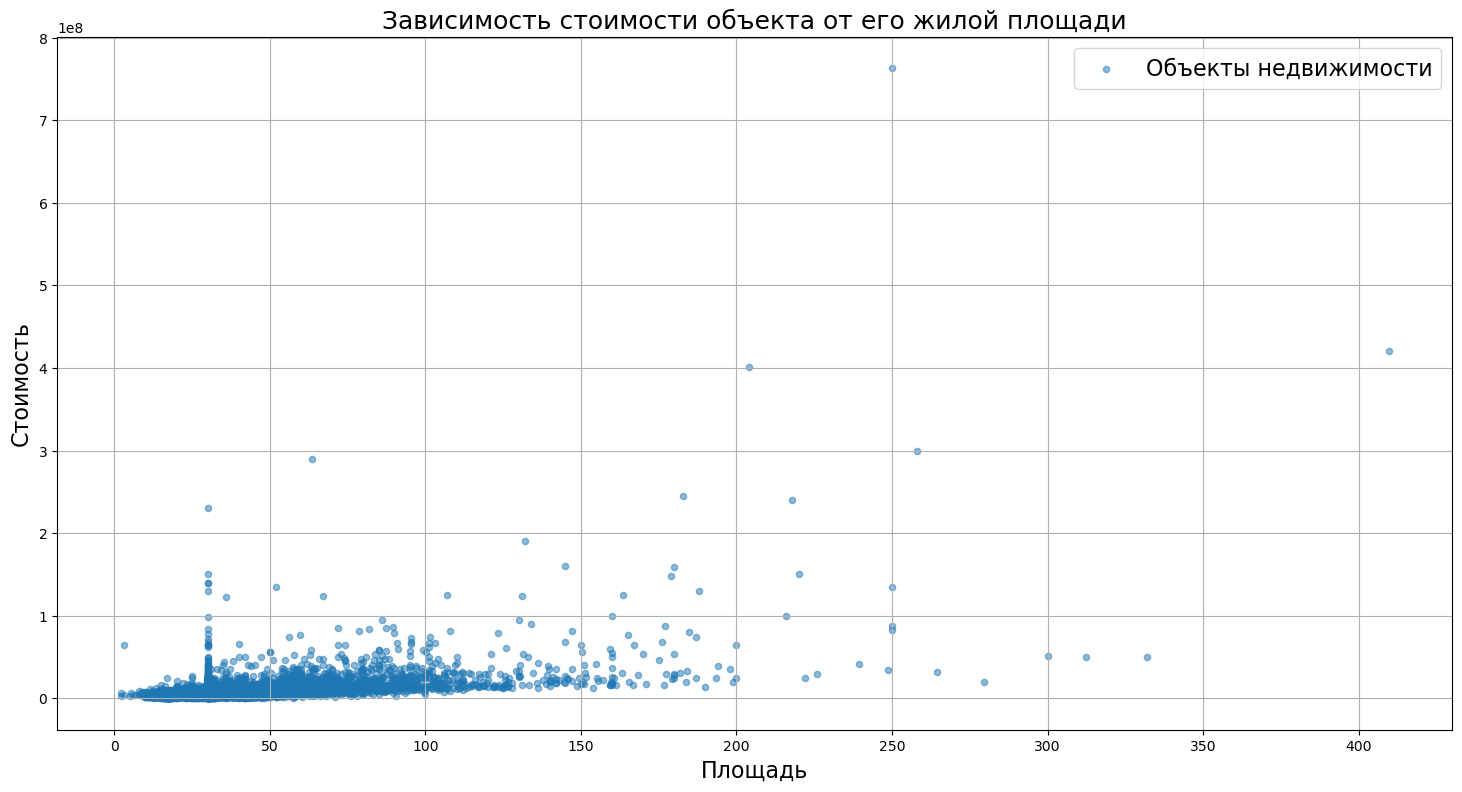

In [112]:
data.plot(x='living_area', y='last_price', kind='scatter', figsize=(18, 9), alpha=0.5)
plt.title('Зависимость стоимости объекта от его жилой площади', fontsize=18)
plt.xlabel('Площадь', fontsize=16)
plt.ylabel('Стоимость', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Описание наблюдения:**

Связь между стоимостью квартиры и его жилой площадью также имеется. Коэффициент корреляции немного ниже предыдущего и составляет 0.54, но он по-прежнему находится в средней зависимости. Диаграма рассеяния нам показывает аналогичную закономерность при увеличении жилой площади увеличивается и стоимость объекта недвижимости.

**Зависимость стоимости объекта от площади его кухни.**

**Посчитаем отдельно коэффициент корреляции между стоимостью объекта и площадью его кухни.**

In [113]:
data['last_price'].corr(data['kitchen_area'])

0.42734757365807224

**Выведем диаграму рассеяния признаков**

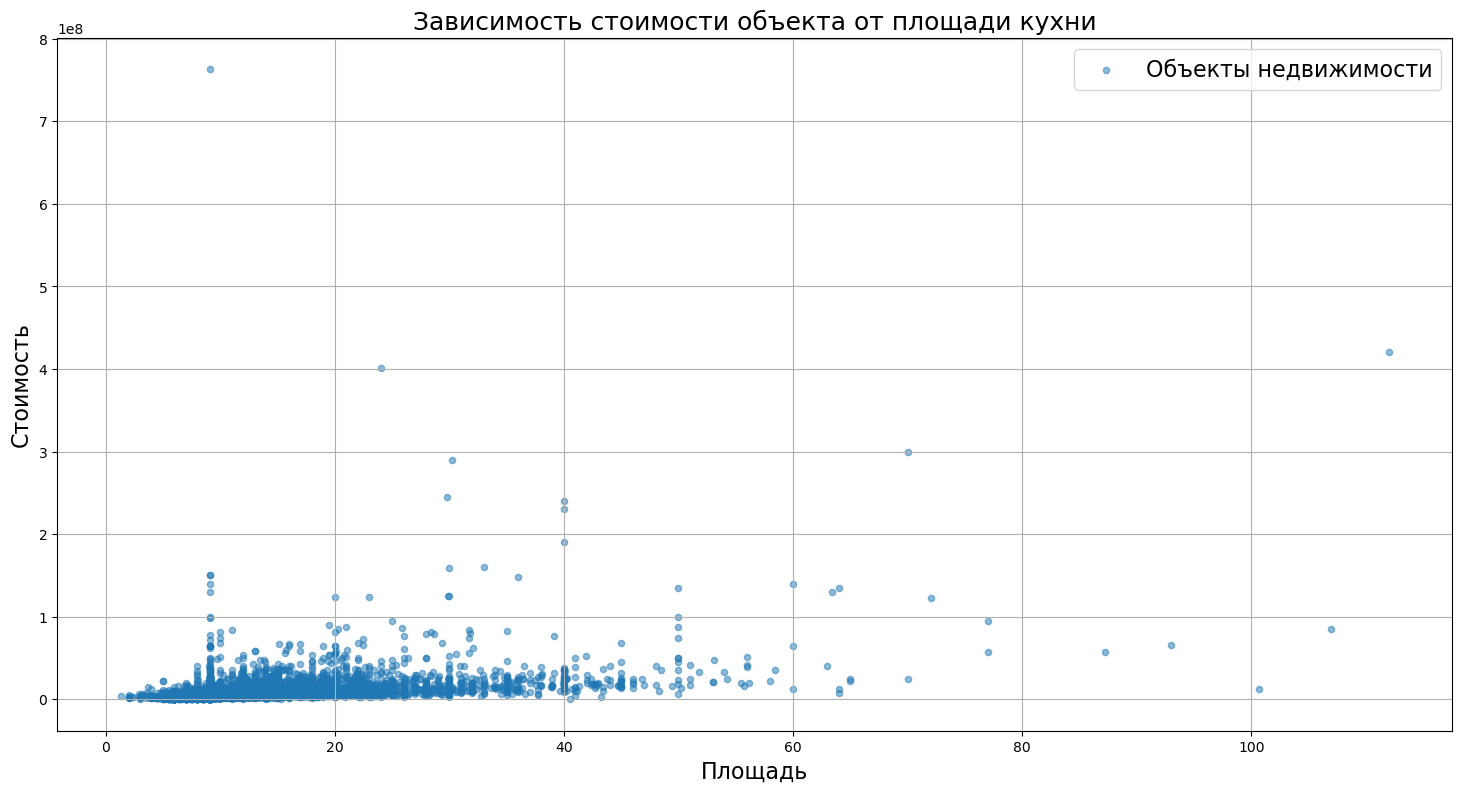

In [114]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(18, 9), alpha=0.5)
plt.title('Зависимость стоимости объекта от площади кухни', fontsize=18)
plt.xlabel('Площадь', fontsize=16)
plt.ylabel('Стоимость', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Описание наблюдения:**

Величина коэффициента корреляции между переменными 0.44 - уже слабая. Видим закономерность потери зависимости стоимости квартиры при переходе от общей площади к жилой площадли и площади кухни. Общая площадь наиболее значимый и зависимый фактор стоимоти квартиры в отличие от других характеристик площади квартир.

**Зависимость стоимости объекта от количества комнат**

**Посчитаем отдельно коэффициент корреляции между стоимостью объекта и количеством комнат.**

In [115]:
data['last_price'].corr(data['rooms'])

0.3476767560330726

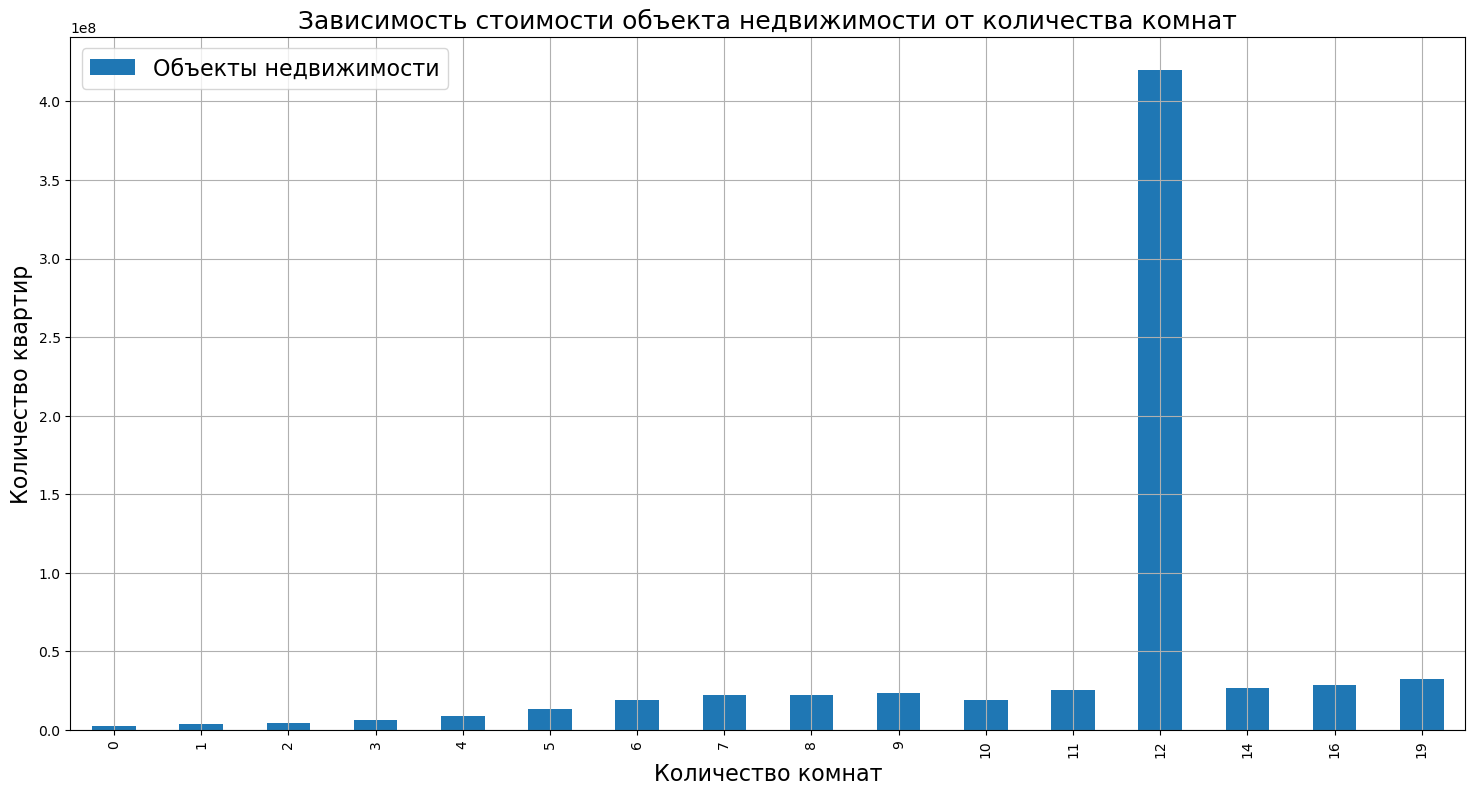

In [116]:
data_filtered_rooms = data.groupby('rooms')['last_price'].median()
data_filtered_rooms.plot(x='rooms', y='last_price', kind='bar', figsize=(18, 9))
plt.title('Зависимость стоимости объекта недвижимости от количества комнат', fontsize=18)
plt.xlabel('Количество комнат', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper left', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Вывод:**

Прослеживается явная тенденция увеличения стоимости квартиры в зависимости от количества комнат.

**Зависимость стоимости объекта от этажа, на котором расположена квартира (первый, последний, другой)**

**Выполним группировку и посмотрим непосредственно какие категории квартир дешевле**

C:\Users\user\AppData\Local\Temp\ipykernel_8324\1116939629.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_filtered_rooms = data.groupby('floor_category')['last_price'].median()


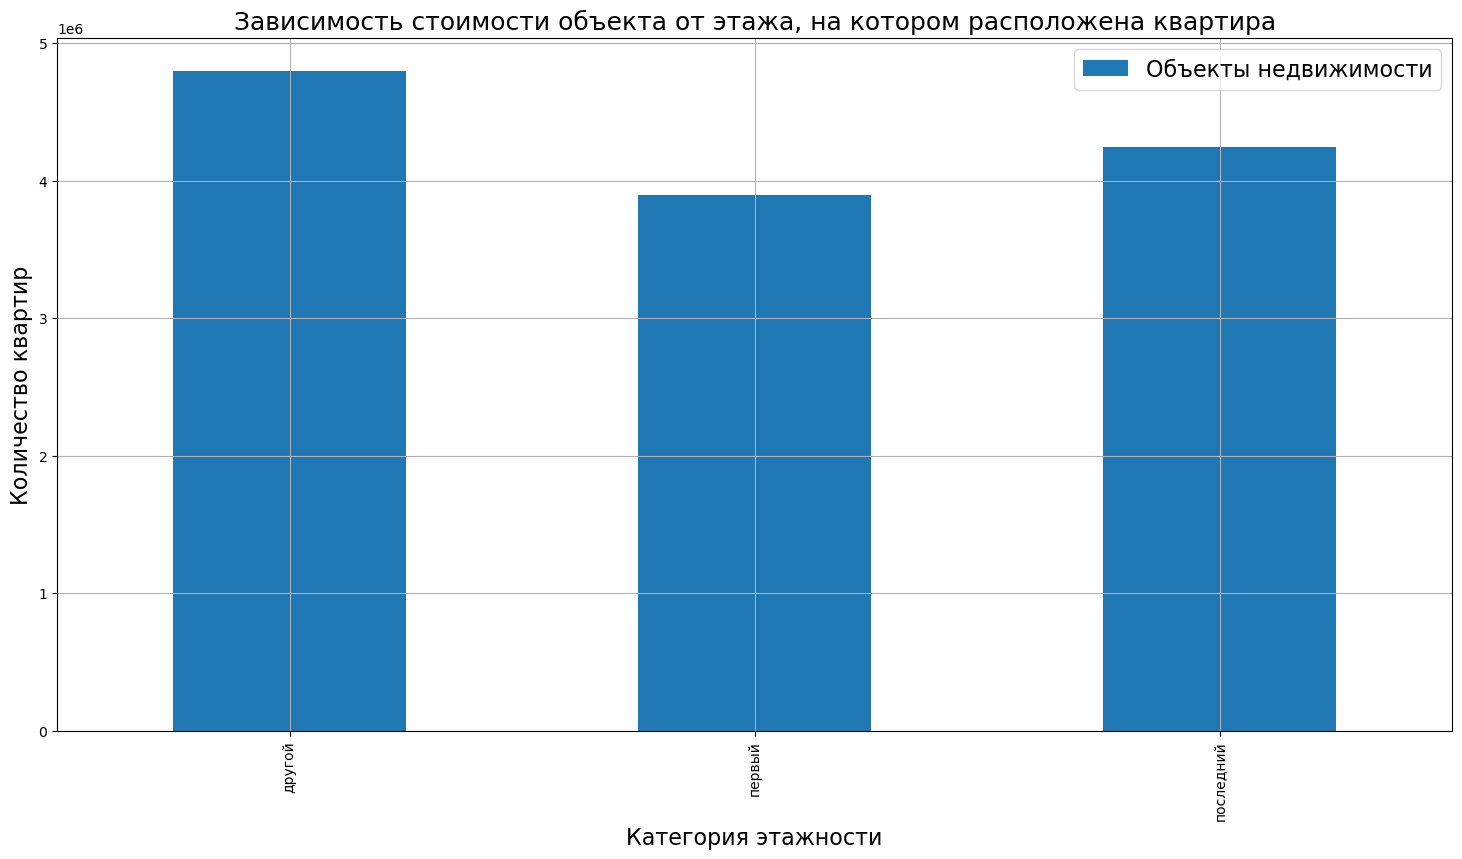

In [117]:
data_filtered_rooms = data.groupby('floor_category')['last_price'].median()
data_filtered_rooms.plot(x='floor_category', y='last_price', kind='bar', figsize=(18, 9))
plt.title('Зависимость стоимости объекта от этажа, на котором расположена квартира', fontsize=18)
plt.xlabel('Категория этажности', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Вывод:**

Квартиры, расположенные на первом и последнем этажах как правило дешевле, чем остальные объекты недвижимости. Знание этой общей закономерности может пригодиться в работе на рынке недвижимости. Также нужно иметь ввиду, что коэффициен корреляции между стоимостью квартир и этажностью дома ('floor') равен 0.02, а это очень низкое значение показывающее практически отсутствие связи между переменными.

**Зависимость стоимости объекта от даты размещения (день недели, месяц, год)**

**Выведем диаграмы рассеяния**

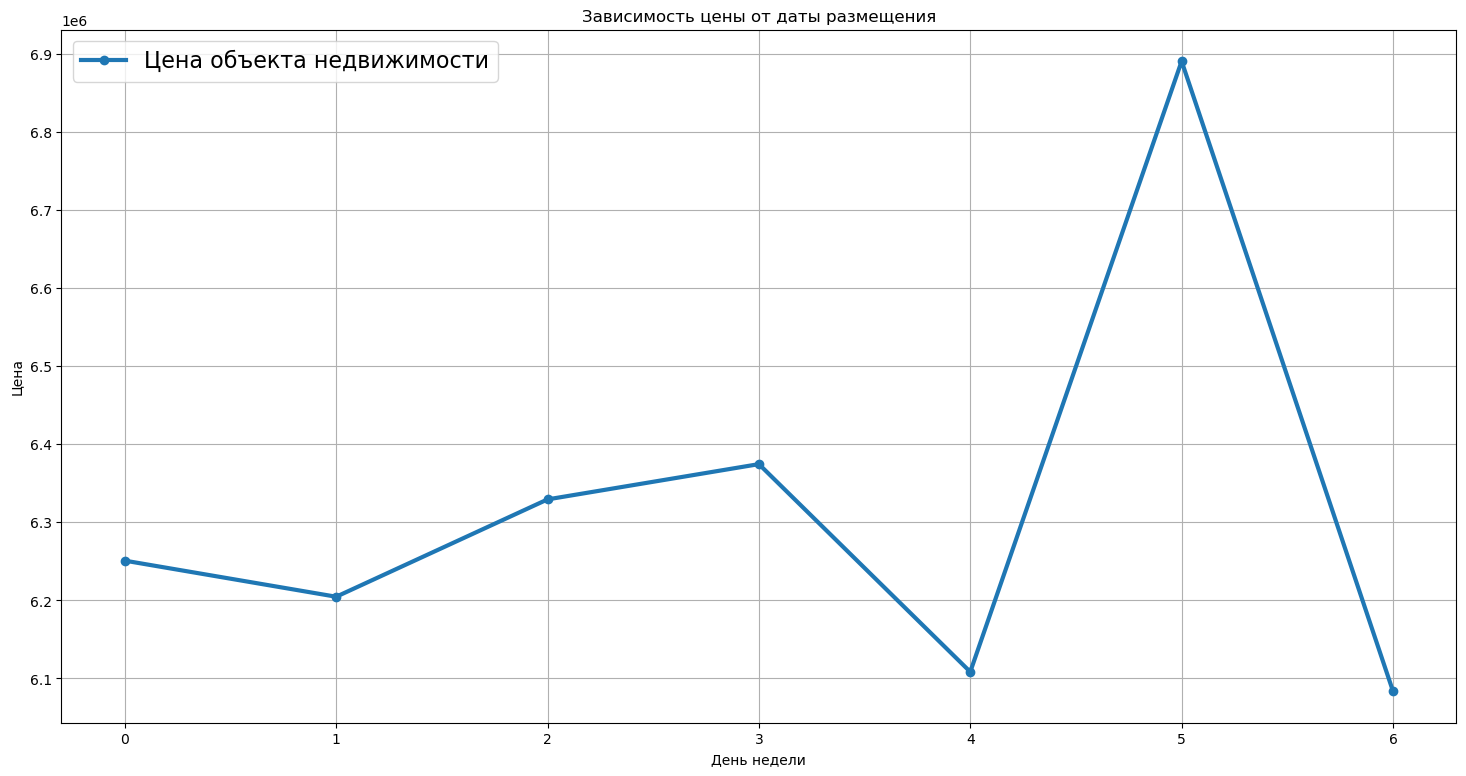

In [118]:
data.pivot_table(index='weekday_exposition', 
                 values=['last_price']).plot(grid=True, 
                                             style='o-', 
                                             figsize=(18, 9), 
                                             linewidth=3, 
                                             title='Зависимость цены от даты размещения')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.legend(['Цена объекта недвижимости'], loc='upper left', fontsize=16)
plt.show(close=None, block=None)

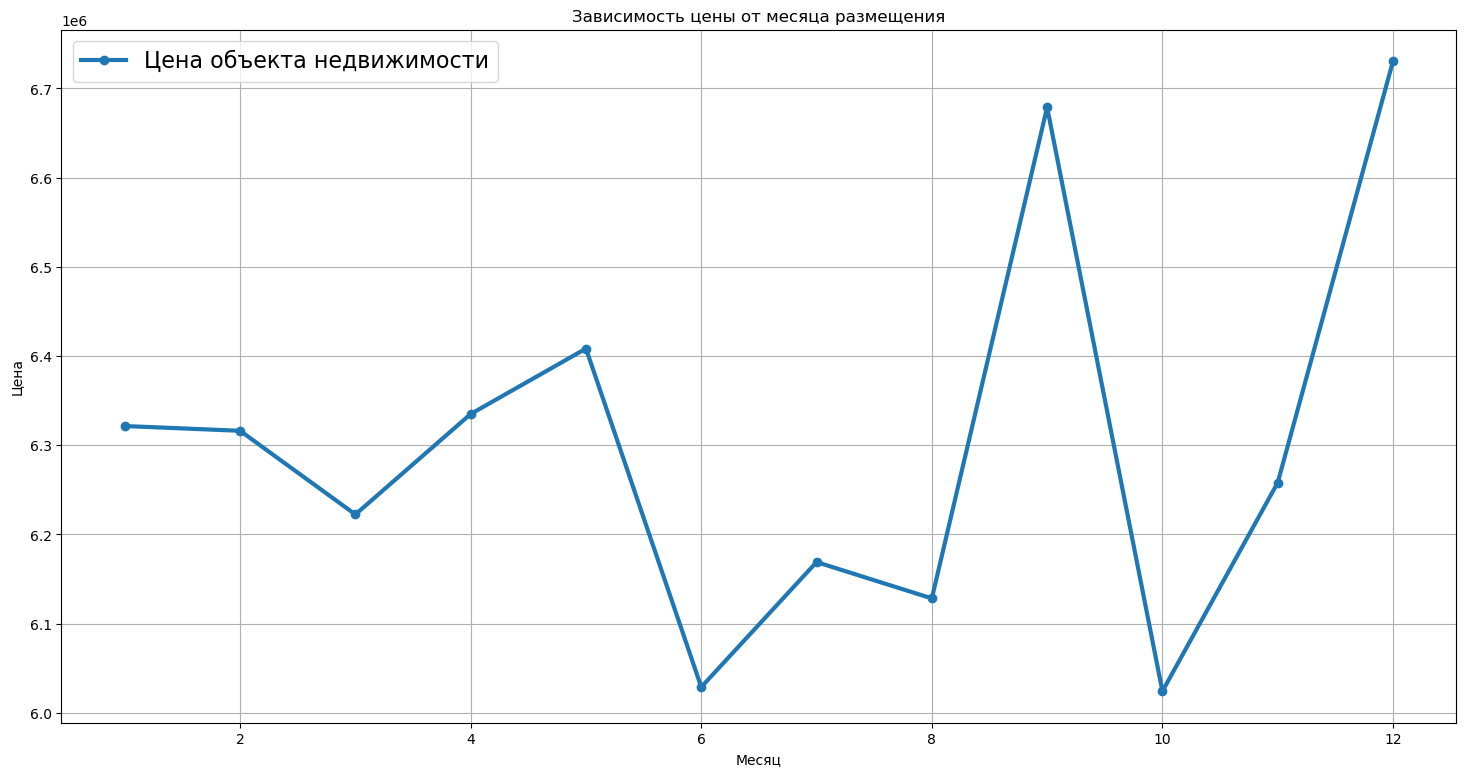

In [119]:
data.pivot_table(index='month_exposition', 
                 values=['last_price']).plot(grid=True, 
                                             style='o-', 
                                             figsize=(18, 9), 
                                             linewidth=3, 
                                             title='Зависимость цены от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.legend(['Цена объекта недвижимости'], loc='upper left', fontsize=16)
plt.show(close=None, block=None)

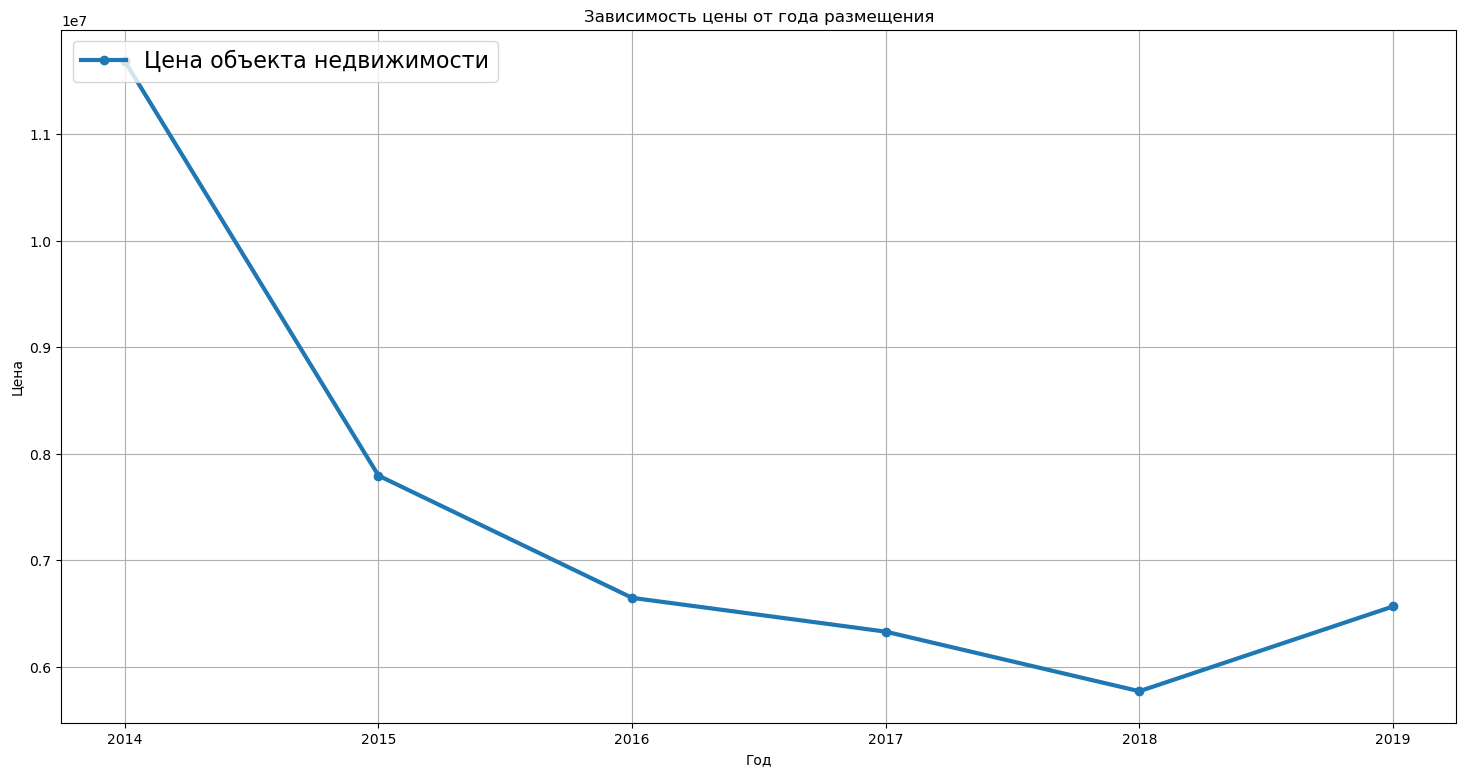

In [120]:
data.pivot_table(index='year_exposition', 
                 values=['last_price']).plot(grid=True, 
                                             style='o-', 
                                             figsize=(18, 9), 
                                             linewidth=3, 
                                             title='Зависимость цены от года размещения')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.legend(['Цена объекта недвижимости'], loc='upper left', fontsize=16)
plt.show(close=None, block=None)

**Описние наблюдения:**

Коэффициенты корреляции между стоимостью квартиры и датой размещения публикации очень слабые, зависимости не наблюдается. 

**Выводы:**

На стоимость квартиры на рынке недвижимости влияют самые различные переменные. Из исследованных выше, наибольшуе связь с ценой имеют показатели площади, и в первую очередь общей площади и жилой площади.

Коэффициенты корреляции стоимости объекта недвижимости и категории этажей (первый, последний, другой) очень слабые. Но, выявлено, что сотимость квартир на первом и последних этажах ниже.

Также очень низкие коэффициенты корреляции и отсуствие связи между стоимостью квартиры и даты размещения объявления (день недели, месяц, год).

Все эти выявленные показатели нужно учитывать при работе на рынке недвижимости и прогнозировании продаж и цен в зависимости от количества разных объектов и их характеристик (общей площади, жилой площади и др.).

##### **Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [121]:
top_10_price = data.pivot_table(index='locality_name', values='one_square_price', aggfunc=['count', 'median'])
top_10_price.columns = ['count', 'median']
top_10_price = top_10_price.sort_values('count', ascending=False)
top_10_price.head(10)

,count,median
locality_name,,
Санкт-Пётёрбург,15277,104545.450
посёлок Мурино,586,86250.375
посёлок Шушары,438,76747.970
Всёволожск,394,65789.470
Пушкин,359,99987.180
Колпино,338,74723.745
посёлок Парголово,327,91642.860
Гатчина,306,67860.570
дёрёвня Кудрово,299,91860.470


**Вывод:**

Самая высокая стоимость жилья в данной выборке городов в Санкт-Петербурге, самая низкая в Выборге.

##### Средняя стоимость квартир в Санкт-Петербурге на разном удалении от центра

In [122]:
spb = data[data['locality_name'] == 'Санкт-Пётёрбург']
spb = spb.pivot_table(index='city_centers_nearest_km', values='one_square_price', aggfunc='mean')
spb

,one_square_price
city_centers_nearest_km,
0.0,268260.178500
1.0,156806.294586
2.0,155554.937276
3.0,120423.931471
4.0,133365.793087
5.0,140655.540765
6.0,150051.562897
7.0,155875.642360
8.0,124663.964361


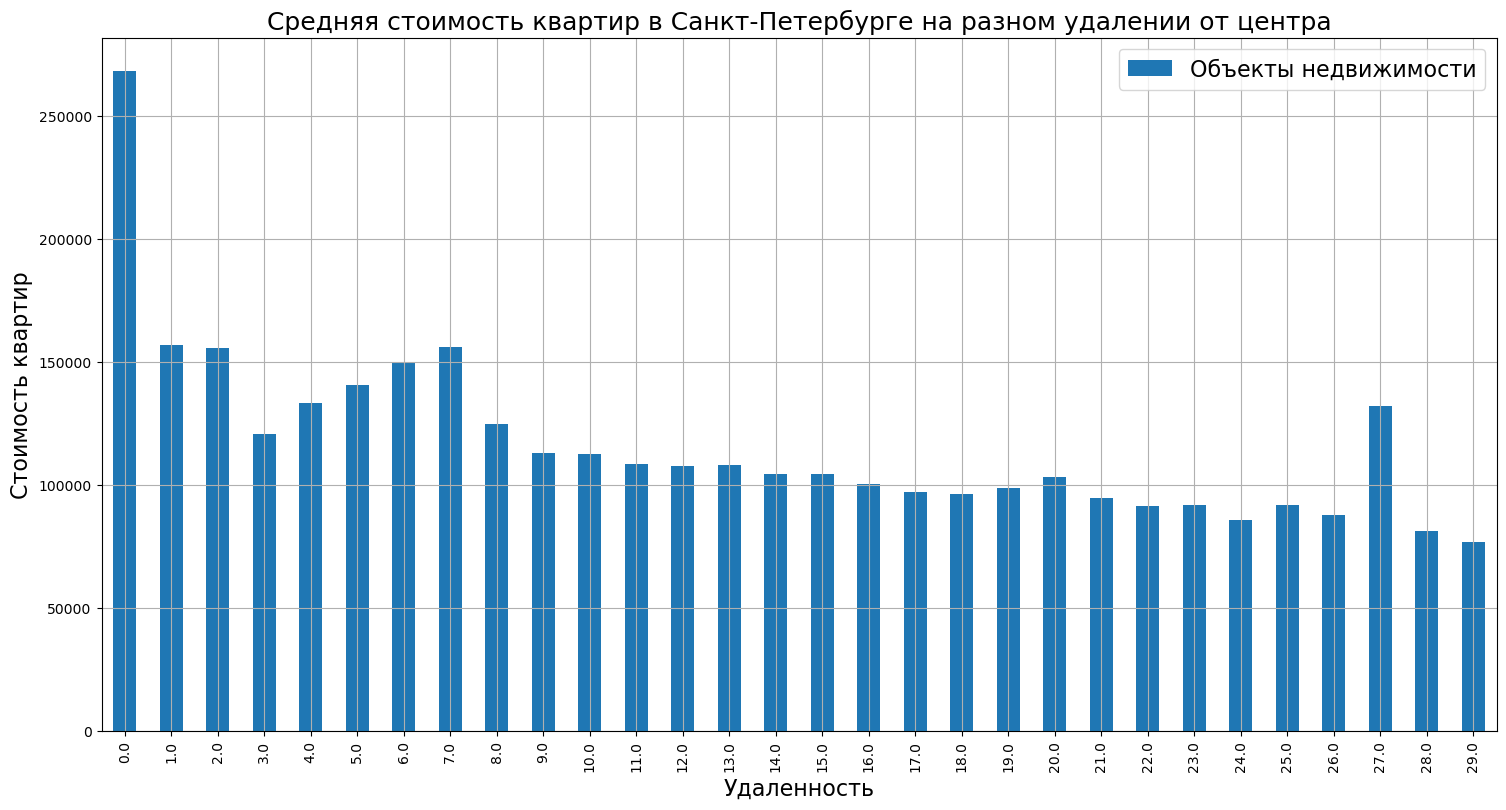

In [123]:
spb.plot(kind='bar', figsize=(18, 9))
plt.title('Средняя стоимость квартир в Санкт-Петербурге на разном удалении от центра', fontsize=18)
plt.xlabel('Удаленность', fontsize=16)
plt.ylabel('Стоимость квартир', fontsize=16)
plt.legend(['Объекты недвижимости'], loc='upper right', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Описание наблюдения:**

По мере удаления от центра города в Санкт-Петербурге на расстоянии до 4 км. прослеживается тенденция к снижению стоимости жилья. В интервале с 5 по 7 километров наблюдается рост средней стоимости жилья. Начиная с 8 и по 29 километры идет постепенное снижение средней стоимости объектов недвижимости, за исключением 27 километра. Возможно, на этом участке пригорода имеются территории с дорогим элитным жильем, равным по стоимости объектам недвижимости, расположенными недалеко от центра Санкт-Петербурга.

### Напишите общий вывод

**По итогам проведения исследования можно сделать следующие выводы:**

1. В начале исследования при первичном знакомстве и изучении набора данных было выявлено, что для проведения анализа требуется провести предобработку данных. В ходе такой предварительной обработки был произведен поиск и обработка пропущенных значений в тех случаях, когда это возможно сделать. Была также произведена работа по поиску и устранению явных и неявных дубликатов, переименованию столбцов, приведению отдельных столбцов к нужному типу данных.

2. Далее, в ходе исследовательского анализа данных были изучены основные параметры объектов недвижимости и их различные переменные (цена, площадь, этаж, удаленность от центра и др.). Выведены и изучены их основные показатели описательной статистики и проведена работа по приведению каждого показателя к корректному и наиболее реалистическому значению путем поиска выбросов и аномалий и их устранения с применением различных межквартильных размахов. Как исследовательский инструмент первичного анализа и поиска аномалий использовалась также визуализация и построение различных типов графиков.

3. Часть исследования была посвящена изучению сроков продажи квартир, в ходе которого была получена информация о минимальных и максимальных сроках продажи объектов. Также было определено, что большая часть объектов недвижимости продается в диапазоне от публикации до 100 дней. Выявленная закономерность может оказаться полезной для работы на рынке недвижимости.

4. В ходе исследования также был изучен перечень факторов, кооторые больше всего влияют на стоимость объекта недвижимости. В ходе этой работы проводились вычисления коэффициэнтов корреляции и оценка связи с целевой переменной стоимости жилья. Выявлено, что наибольшая связь у стоимости квартиры имеется с ее общей площадью и жилой площадью (средняя корреляция). Слабая корреляция у стоимости жилья с площадью кухни и количеством комнат. Практически отсутствует зависимость стоимости объектов недвижимости от даты публикации объявлений. Квартиры, расположенные на первом и последнем этажах как правило дешевле, чем остальные объекты недвижимости. Выяленные закономерности могут положительным образом сказаться в работе специалистов на рынке недвижимости, эффективно и реалистично определелять цены на недвижимость в зависимости от различных факторов, а также прогнозировании продаж на рынке недвижимости.

5. В заключении исследования были выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра, а также произведено вычисление средней стоимости квартир в зависимости от удаления от центра и гистограмма средней стоимости в ходе которого получены сведения о динамике изменения цены по мере удаления объекта недвижимости от центра Санкт-петербурга.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [ ]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [ ]  Найдены пропущенные значения.
- [ ]  Пропущенные значения заполнены там, где это возможно.
- [ ]  Объяснено, какие пропущенные значения обнаружены.
- [ ]  В каждом столбце установлен корректный тип данных.
- [ ]  Объяснено, в каких столбцах изменён тип данных и почему.
- [ ]  Устранены неявные дубликаты в названиях населённых пунктов.
- [ ]  Обработаны редкие и выбивающиеся значения (аномалии).
- [ ]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [ ]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [ ]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [ ]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [ ]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [ ]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [ ]  На каждом этапе сделаны промежуточные выводы.
- [ ]  В конце проекта сделан общий вывод.